In [2]:
import pandas as pd
import numpy as np
import os,sys
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import matplotlib.patches as mpatches

import cooler
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from bx.intervals.intersection import Intersecter, Interval

from scipy.stats import ranksums

import pandas as pd
import numpy as np
import sys
import pyBigWig

sys.path.append('/annoroad/data1/bioinfo/PMO/yuanzan/project/comm/commander_test/hg38/Pancreatic-BTET-021/trackC')

import track_heatmap
import track_compartment
import track_tad
#import track_loop

from imp import reload


reload(track_heatmap)
reload(track_compartment)
reload(track_tad)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/tmp/ipykernel_1220/2781848022.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


<module 'track_tad' from '/annoroad/data1/bioinfo/PMO/yuanzan/project/comm/commander_test/hg38/Pancreatic-BTET-021/trackC/track_tad.py'>

In [4]:
plt.style.available
plt.style.use('classic')

In [5]:
my23colors = ['#53868B','#00F5FF','#C1FFC1','#0000FF','#7B68EE',
                  '#CDCD00','#FFF68F','#CD9B1D','#8B658B','#FF6A6A','#8B3A3A',
                  '#1E90FF','#FF69B4','#8DB6CD','#CAE1FF','#EECFA1','#8B7B8B',
                  '#4F4F4F','#FF4500','#BC8F8F','#FFA500','#228B22','#8B4513']


In [6]:
import os
os.chdir("/annoroad/data1/bioinfo/PMO/yuanzan/project/comm/commander_test/hg38/tongji-2")


In [7]:
bed13 = pd.read_table("./hg19_refGene.sort2.chr_gtf2bed13.bed",header=None,index_col=None,names=['chrom','start','end','name',"score","strand","thickStart","thickEnd","itemRgb","blockCount","blockSizes","blockStarts", "gene_biotype"])
bed13.head(1)
#bed13 = bed13[~bed13["name"].str.startswith("ENSG")]
del bed13["gene_biotype"]

In [8]:
HaCaT1_cMat = cooler.Cooler('/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-011/std/result/fanxuning/zhaoyue/yaojiaying/Basic/HiC/call_loops/Analysis2/cool/HaCaT1_10000.cool')
WT_cMat = cooler.Cooler('/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-011/std/result/fanxuning/zhaoyue/yaojiaying/Basic/HiC/call_loops/Analysis2/cool/WT_10000.cool')


In [11]:
bw_Dir = "/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-011/std/result/fanxuning/zhaoyue/yaojiaying/Basic/ChIPseq/Analysis/process/Alignment/"

HaCaT1_H3K27ac = pyBigWig.open(bw_Dir + "HaCaT1_H3K27ac/HaCaT1_H3K27ac/HaCaT1_H3K27ac.bw")
HaCaT1_CTCF = pyBigWig.open(bw_Dir + "HaCaT1_CTCF/HaCaT1_CTCF/HaCaT1_CTCF.bw")
HaCaT1_RAD21 = pyBigWig.open(bw_Dir + "HaCaT1_RAD21/HaCaT1_RAD21/HaCaT1_RAD21.bw")
HaCaT1_SMC3 = pyBigWig.open(bw_Dir + "HaCaT1_SMC3/HaCaT1_SMC3/HaCaT1_SMC3.bw")

WT_H3K27ac = pyBigWig.open(bw_Dir + "WT_H3K27ac/WT_H3K27ac/WT_H3K27ac.bw")
WT_CTCF = pyBigWig.open(bw_Dir + "WT_CTCF/WT_CTCF/WT_CTCF.bw")
WT_RAD21 = pyBigWig.open(bw_Dir + "WT_RAD21/WT_RAD21/WT_RAD21.bw")
WT_SMC3 = pyBigWig.open(bw_Dir + "WT_SMC3/WT_SMC3/WT_SMC3.bw") 

#HaCaT1_PC1 = pyBigWig.open('/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-011/std/result/fanxuning/zhaoyue/yaojiaying/Figs/Fig3CD/ABCompartment/HaCaT1_100kb_iced_PC1.bw')
#WT_PC1 = pyBigWig.open('/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-011/std/result/fanxuning/zhaoyue/yaojiaying/Figs/Fig3CD/ABCompartment/WT_100kb_iced_PC1.bw')

HaCaT1_RNA = pyBigWig.open("/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-011/std/result/fanxuning/zhaoyue/yaojiaying/Data/RNAseq/HaCaT1-1_sort.bw")
WT_RNA = pyBigWig.open('/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-011/std/result/fanxuning/zhaoyue/yaojiaying/Data/RNAseq/WT-1_sort.bw')


### peak & bw track view

In [12]:
WT_IP = pyBigWig.open('/annoroad/data1/bioinfo/PROJECT/Commercial/Cooperation/EPI/Chip/XS01KF2022120269/PM-XS01KF2022120269-02/shanzhong/Analysis-test/Analysis/process/Alignment/IPWT/IPWT1/IPWT1.bw')
WT_Input = pyBigWig.open("/annoroad/data1/bioinfo/PROJECT/Commercial/Cooperation/EPI/Chip/XS01KF2022120269/PM-XS01KF2022120269-02/shanzhong/Analysis-test/Analysis/process/Alignment/inputWT/inputWT/inputWT.bw")

In [69]:
WT_IP.chroms()

{'NC_057316.1': 7466040,
 'NC_057317.1': 6775769,
 'NC_057318.1': 6429791,
 'NC_057319.1': 5747404,
 'NC_057320.1': 5103626,
 'NC_057321.1': 3124897,
 'NC_057322.1': 2412559}

In [14]:
from matplotlib import cm
map_vir = cm.get_cmap('Blues')

peak_bed = pd.read_table("/annoroad/data1/bioinfo/PMO/yuanzan/project/comm/commander_test/macs2/IPWT1_peaks.xls", skiprows=27, header=0)


def plot_bed(ax, bed, chrom, start, end, negLog10PvalueCutoff=3):
    bed = bed[bed['chr']==chrom]
    bed = bed[(bed['end']>=start) & (bed['start']<=end) & (bed['-log10(pvalue)']>=negLog10PvalueCutoff)]
    
    # 因为 y 大到一定程度超过临界数值后颜色就会饱和不变(不使用循环colormap)。
    norm = plt.Normalize(bed['-log10(pvalue)'].min(), bed['-log10(pvalue)'].max())
    # matplotlib.colors.Normalize 对象，可以作为参数传入到绘图方法里
    # 也可给其传入数值直接计算归一化的结果
    norm_y = norm(bed['-log10(pvalue)'])
    colors = map_vir(norm_y)
    
    ax.bar(x='start', width='length', height=1, bottom=0, align='edge', color= colors, edgecolor=None,  data=bed)
    ax.set_xlim(start, end)
    ax.set_ylabel("Peak", rotation =0, horizontalalignment='right')
    sm = cm.ScalarMappable(norm=norm, cmap=map_vir)
    cb = plt.colorbar(sm, ax=ax, location='top', label="-log10(pvalue)")
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    
def plot_bed2(ax, bed, chrom, start, end, negLog10PvalueCutoff=3):
    bed = bed[bed['chr']==chrom]
    bed = bed[(bed['end']>=start) & (bed['start']<=end) & (bed['-log10(pvalue)']>=negLog10PvalueCutoff)]
    
    # 因为 y 大到一定程度超过临界数值后颜色就会饱和不变(不使用循环colormap)。
    norm = plt.Normalize(bed['-log10(pvalue)'].min(), bed['-log10(pvalue)'].max())
    # matplotlib.colors.Normalize 对象，可以作为参数传入到绘图方法里
    # 也可给其传入数值直接计算归一化的结果
    norm_y = norm(bed['-log10(pvalue)'])
    colors = map_vir(norm_y)
    #colors = map_vir(bed['-log10(pvalue)'])
    
    ax.bar(x='start', width='length', height="-log10(pvalue)", bottom=0, align='edge', color= colors, edgecolor=colors,  data=bed)
    ax.set_xlim(start, end)
    ax.set_ylabel("Peak", rotation =0, horizontalalignment='right')
    sm = cm.ScalarMappable(norm=norm, cmap=map_vir)
    
    cax = ax.inset_axes([1.01, 0, 0.01, 1])
    cb = plt.colorbar(sm, ax=ax, cax=cax, label="-log10(pvalue)")
    cb.set_label("-log10(pvalue)", fontsize=6)
    #cb.set_tittle(fontsize=8)
    #print(help(cb))
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    
    

(0.0, 3.6)

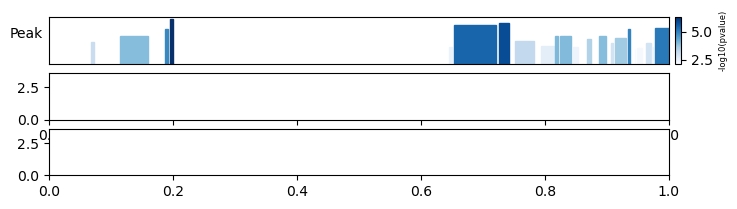

In [15]:

plt.style.use("default")
fig = plt.figure(figsize=(8, 2))
ax = fig.add_gridspec(nrows=3, ncols=1,top=0.9, right=0.9).subplots()

chrom = 'NC_057316.1'
start = 1100000
end = 1600000

plot_bed2(ax[0], peak_bed, chrom, start, end, negLog10PvalueCutoff=2)

"""
plot_bwTrack3(ax[1], WT_IP, 'WT_IP', chrom, start, end, 
              bins=1000, yminx=5, ymaxx=99,rotation=0, fl='%0.2f',color='#464451')
plot_bwTrack3(ax[2], WT_Input, 'WT_Input', chrom, start, end, 
              bins=1000, yminx=5, ymaxx=99,rotation=0, fl='%0.2f',color='#464451')
"""
ax[1].set_ylim(top=3.6)
ax[2].set_ylim(top=3.6)


In [1]:

plt.style.use("default")
fig = plt.figure(figsize=(8, 2))
ax = fig.add_gridspec(nrows=3, ncols=1,top=0.9, right=0.9).subplots()

chrom = 'NC_057316.1'
start = 1100000
end = 1600000

plot_bed2(ax[0], peak_bed, chrom, start, end, negLog10PvalueCutoff=2)


plot_bwTrack3(ax[1], WT_IP, 'WT_IP', chrom, start, end, 
              bins=1000, yminx=5, ymaxx=99,rotation=0, fl='%0.2f',color='#464451')
plot_bwTrack3(ax[2], WT_Input, 'WT_Input', chrom, start, end, 
              bins=1000, yminx=5, ymaxx=99,rotation=0, fl='%0.2f',color='#464451')

ax[1].set_ylim(top=3.6)
ax[2].set_ylim(top=3.6)


NameError: name 'plt' is not defined

### end

In [16]:
HaCaT1_loop = pd.read_table('/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-011/std/result/fanxuning/zhaoyue/yaojiaying/Data/HiC/loop/HaCaT1_loops_2M.arcs', header=None, names=['chr1', 'x1', 'x2', 'chr2', 'y1', 'y2', 'arc'])
WT_loop = pd.read_table('/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-011/std/result/fanxuning/zhaoyue/yaojiaying/Data/HiC/loop/WT_loops_2M.arcs', header=None, names=['chr1', 'x1', 'x2', 'chr2', 'y1', 'y2', 'arc'])


In [17]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

my23colors = ['#53868B','#00F5FF','#C1FFC1','#0000FF','#7B68EE',
                  '#CDCD00','#FFF68F','#CD9B1D','#8B658B','#FF6A6A','#8B3A3A',
                  '#1E90FF','#FF69B4','#8DB6CD','#CAE1FF','#EECFA1','#8B7B8B',
                  '#4F4F4F','#FF4500','#BC8F8F','#FFA500','#228B22','#8B4513']


def heatmap_triangle_final(axes, coolMat, matBalance=False, regions=["chr6:119940450-123940450", "chr18:8432736-12432736"], width=6, height=3, cmap=mpl.cm.YlGnBu, showXticks=True, title=None, ymax=None, logData=False):
    """Create a heatmap of the lower triangle of a pairwise correlation
    matrix of all pairs of columns in the given dataframe. The heatmap
    triangle is rotated 45 degrees clockwise and drawn on the given axes.
    Parameters
    ----------
    dataframe : pandas.DataFrame
    axes : matplotlib.axes.Axes
    """
    dataframe, rdf = get_plotDF(coolMat, regions, matBalance)
    #print(rdf)
    if logData == True:
        dataframe = np.log2(dataframe)

    N = dataframe.shape[1]

    # Transformation matrix for rotating the heatmap.
    A = np.array([(y, x) for x in range(N, -1, -1) for y in range(N + 1)])
    t = np.array([[1,0.5], [-1,0.5]])
    A = np.dot(A, t)

    C = np.triu(dataframe)
    # -1.0 correlation is blue, 0.0 is white, 1.0 is red.
    #cmap = pl.cm.RdBu_r
    #norm = mp.colors.BoundaryNorm(np.linspace(-1, 1, 14), cmap.N)

    # This MUST be before the call to pl.pcolormesh() to align properly.
    #axes.set_xticks([])
    axes.set_yticks([])

    # Plot the correlation heatmap triangle.
    X = A[:, 1].reshape(N + 1, N + 1)
    Y = A[:, 0].reshape(N + 1, N + 1)

    #caxes = pl.pcolormesh(X, Y, np.fliplr(C), axes=axes, cmap=cmap, norm=norm)

    #norm=MidpointNormalize(midpoint=0,vmin=-1, vmax=1)
    caxes = axes.pcolormesh(X, Y, np.flipud(C), axes=axes, cmap=cmap, edgecolor='none', snap=True, linewidth=.001)
    #caxes = axes.matshow(np.flipud(C), cmap=cmap, norm=norm)

    # Remove the ticks and reset the x limit.

    axes.set_ylim(bottom=0)
    axes.set_xlim(left=0)
    if ymax != None:
        axes.set_ylim(top=ymax)
    axes.set_title(title)
    
    #set_heatmap_ticks(axes)
    
    axes.axis("off")
    #plot_heatmap_triangle_xticks(axes, regin1_mat.shape[1], regin2_mat.shape[1], chrom1, start1, end1, chrom2, start2, end2, showXticks)
    #if ymax==None:
    #    colorbar_bottomright(axes, caxes)
    #else:
    colorbar_triangle(axes, caxes, ymax)
    #plt.show()
    return(rdf["len"], rdf["reverse"])

    #return fig
    #return caxes, D.index

    
def plot_heatmap_triangle_xticks(ax, regin1_binN, regin2_binN, chrom1, start1, end1, chrom2, start2, end2, showXticks):
    #ax.set_xticks([])
    ax.set_xticks([0, regin1_binN, regin1_binN + regin2_binN])
    ax.set_xticklabels([start1, str(end1) + " " + str(start2), end2])
    
    ax.set_yticklabels([])
    ax.set_yticks([])
    
    ax.xaxis.tick_top()
    ax.spines['top'].set_color('k')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')

   
def colorbar_triangle(axm,im,ymax):
    height="2%"
    width="10%"
    if ymax!=None:
        height="6%"
    axins1 = inset_axes(axm, width=width, height=height, loc=4, bbox_to_anchor=(-0.1, 0.7, 1.2, 2.9), bbox_transform=axm.transAxes,)
    cbar=plt.colorbar(im, cax=axins1, orientation='horizontal')
    cbar.ax.xaxis.tick_top()
    cbar.ax.spines['top'].set_color('none')
    cbar.ax.spines['right'].set_color('none')
    cbar.ax.spines['bottom'].set_color('none')
    cbar.ax.spines['left'].set_color('none')

import matplotlib.patches as mpatches
    
def split_region(region):    
    tmp = region.split(":")
    chrom = tmp[0]
    start = tmp[1].split("-")[0]
    end = tmp[1].split("-")[1]
    return(chrom, start, end)
    
def plot_chrom_arrow(ax, region_len, rev_region, regions, colors=my23colors[3:22]):
    ax.axis("off")
    ax.set_xlim(0,sum(region_len))
    ax.set_ylim(-2,2)
    
    start = 0
    for i, v in enumerate(region_len):
        if rev_region[i] == True:
            arrow = mpatches.FancyArrowPatch((start+v+1, 0), (start-1, 0), mutation_scale=30, color=colors[i])
            ax.add_patch(arrow) 
        else:
            arrow = mpatches.FancyArrowPatch((start-1, 0), (start+v+1, 0), mutation_scale=30, color=colors[i])
            ax.add_patch(arrow) 
            
        #ax.add_patch(arrow)    
        chrom, start_str, end_str = split_region(regions[i])
        #ax.text(start+region_len[i]/2, -1.5, chrom, horizontalalignment='center', verticalalignment='top', fontsize=10, color=colors[i])
        ax.text(start+region_len[i]/2, 0, chrom, horizontalalignment='center', verticalalignment='center', fontsize=10, color="black")
        
        ax.text(start, -1.5, start_str, horizontalalignment='left', verticalalignment='top', fontsize=9, color=colors[i], rotation=90)
        ax.text(start+region_len[i], -1.5, end_str, horizontalalignment='right', verticalalignment='top', fontsize=9, color=colors[i], rotation=90)
        start = start + v

def get_plotDF(coolMat, regions=["6:119940450-123940450", "18:12432736-8400000", "4:10500000-10000000"], balance=False):
    """Extract a set of regions matrix from the cool format Hi-C matrix.

    The extracted matrix will splice intra and Inter region interaction according to 
        the given order and direction of the regions.

    Args:
        coolMat (cooler.Cooler): cool format Hi-C matrix (https://github.com/open2c/cooler)
        regions (list): Region format as ["6:119940450-123940450", "18:12432736-8432736"]
        balance (bool): The 'balance' parameters of coolMat.matrix(balance=False).fetch('chr6:119940450-123940450')

    Returns:
        pd.DataFrame: Region interaction matrix

    """
    rdf = pd.DataFrame(regions)
    rdf.columns = ["region"]
    sp_resions = rdf["region"].apply(split_region)
    rdf["chrom"] = [i[0] for i in sp_resions]
    rdf["start"] = [int(i[1]) for i in sp_resions]
    rdf["end"] = [int(i[2]) for i in sp_resions]

    rdf["reverse"] = False
    needRevdf = rdf[rdf["end"] < rdf["start"]]
 
    rdf.loc[needRevdf.index, "reverse"] = True
    rdf["regionForCool"] = rdf["region"]
    rdf.loc[needRevdf.index, "regionForCool"] = needRevdf["chrom"] + ":" + needRevdf["end"].apply(str) + "-" + needRevdf["start"].apply(str)

    region_mat_dic = {}

    for regin1 in rdf["regionForCool"]:
        for regin2 in rdf["regionForCool"]:
            region_mat_dic["{0}__{1}".format(regin1, regin2)] = coolMat.matrix(balance=balance).fetch(regin1, regin2)
            #rdf.loc[]

    for i, row in rdf.iterrows():
        if row["reverse"] == True:
            for region_2 in rdf["regionForCool"]:
                region_mat_dic["{0}__{1}".format(row["regionForCool"], region_2)] = np.flip(region_mat_dic["{0}__{1}".format(row["regionForCool"], region_2)], 0)
                region_mat_dic["{1}__{0}".format(row["regionForCool"], region_2)] = np.flip(region_mat_dic["{1}__{0}".format(row["regionForCool"], region_2)], 1)

                
    hstack_list = [None]*rdf.shape[0]
    vstack_list = [None]*rdf.shape[0]
    
    for i, regin1 in enumerate(rdf["regionForCool"]):
        for ii, regin2 in enumerate(rdf["regionForCool"]):
            hstack_list[ii] = region_mat_dic["{0}__{1}".format(regin1, regin2)]
        
        vstack_list[i] = np.hstack(tuple(hstack_list))
                          
    dataframe = np.vstack(tuple(vstack_list))
    
    #### 
    rdf["len"] = 0
    rdf_cp = rdf.copy()
    for i, row in rdf_cp.iterrows():
        rdf.loc[i, "len"] = region_mat_dic["{0}__{1}".format(row["regionForCool"], row["regionForCool"])].shape[0]
        
    return dataframe, rdf
        
        

In [60]:
def plot_bwTrack3(ax, bw, ylabel, chrom, start, end, bins=1000, ymax=None, ymin=None, rotation=0, fl='%0.2f',color
='#464451'):
    
    ax.tick_params(bottom =False,top=False,left=True,right=False)
    ax.spines['left'].set_color('none')
    ax.spines['left'].set_linewidth(0)
    ax.spines['bottom'].set_color('none')
    ax.spines['bottom'].set_linewidth(0)
    ax.spines['top'].set_color('none')
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_color('none')
    ax.spines['right'].set_linewidth(0)
    
    plot_list = bw.stats(chrom, start, end, type="mean", nBins=bins)
    plot_list = [0 if v is None else v  for v in plot_list]
    
    ax.bar(x=range(0,bins), height=plot_list, width=1, bottom=[0]*(bins),color=color,align="edge",edgecolor=color)    
    ax.set_xlim(0,bins)

    #ymin = np.percentile(plot_list,yminx)
    #ymax = np.percentile(plot_list,ymaxx)

    #ax.set_yticks([ymin, ymax])
    #ax.set_yticklabels([fl % ymin, fl % ymax], fontsize=7)
    #ax.text(0, ymax, "[{0}, {1}]".format(fl % ymin, fl % ymax), verticalalignment="top", fontsize=6)
    if ymin == None:
        ymin = min(plot_list)
    if ymax == None:
        ymax = max(plot_list)
    print(111111, ymin, ymax)
    ax.text(0, ymax, "[{0}, {1}]".format(fl % ymin, fl % ymax), verticalalignment="top", fontsize=6)
    
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(ylabel, fontsize=8, rotation=rotation, horizontalalignment='right',verticalalignment='center')
    
    ax.set_xticks([])
    ax.set_xticklabels('')
    ax.set_yticks([])
    ax.set_yticklabels('')
    
def plot_compartment(compartment_bw, ax, chrom, start, end, ylabel, xticklabel=False, Acolor="#3271B2", Bcolor="#FBD23C", binsize=100000):
    chrsize = compartment_bw.chroms()[chrom]
    xbins = int(chrsize/binsize)
    if chrsize % binsize > 0:
        xbins = xbins + 1
        
    plot_list = compartment_bw.stats(chrom, 0, chrsize, nBins=xbins)
    mat=pd.DataFrame({"pc1":plot_list})
    mat["start"] = mat.index * binsize
    mat["width"] = binsize
    mat.loc[mat.index[-1],"length"] = chrsize % binsize
    mat.loc[mat[np.isnan(mat.pc1)].index, "pc1"] = 0
    
    plus = mat[mat['pc1']>0]
    minux = mat[mat['pc1']<=0]
 
    ax.bar(x=list(plus["start"]), height=plus['pc1'], width=plus["width"], bottom=[0]*(plus.shape[0]),color=Acolor,align="edge",edgecolor=Acolor,label="A")
    ax.bar(x=list(minux["start"]), height=minux['pc1'], width=minux["width"], bottom=[0]*(minux.shape[0]),color=Bcolor,align="edge",edgecolor=Bcolor,label="B")
    #ax.bar(0,height=0,color="#E27678",align="edge",edgecolor="#E27678",label="A2B")
    #ax.bar(0,height=0,color="#85AFBD",align="edge",edgecolor="#85AFBD",label="B2A")

    #ax.set_xlim(0, chrsize)
    ax.grid(False)
    ax.tick_params(bottom =False,top=False,left=True,right=False) #去掉tick线
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.plot([0, chrsize], [0,0], '-', label='', linewidth=1, color='black')
    #ax.set_yticklabels('')
    ax.set_ylabel(ylabel, fontsize=10, rotation='horizontal', horizontalalignment='right',verticalalignment='center')
    #ax.set_ylim([-1,1])
    #ax.set_yticks([-1, 1])
    ax.set_yticklabels([-1, 1], fontsize=8)
    if xticklabel==False:
        ax.set_xticklabels('')
    
    ax.set_xlim(start, end)

    

In [19]:
def plot_gene(ax, gene_bed, chrom, start, end, line=1, gene_col=[], fontszie=5):
    gene_bed = gene_bed[gene_bed['chrom']==chrom]
    gene_bed_plot = gene_bed[((gene_bed['start'] >= start) & (gene_bed['start'] <= end)) | ((gene_bed['end'] >= start) & (gene_bed['end'] <= end))]
    gene_bed_plot = gene_bed_plot.sort_values(by='end')
    #print(gene_bed_plot
    
    plot_gene_num = gene_bed_plot.shape[0]
    print(plot_gene_num)
    if line == 1:
        for i,row in gene_bed_plot.iterrows():
            ax.plot((row['start'], row['end']), (0.5, 0.5), color='b')
            starts = [int(x) for x in row["blockStarts"].split(",")]
            widths = [int(x) for x in row["blockSizes"].split(",")]
            
            ax.bar(x=starts, height=1, width=widths, bottom=0, \
                   edgecolor='black', linewidth=0, align='edge', color='b', ecolor=None)
    else:
        ii = 0
        for i,row in gene_bed_plot.iterrows():
            col = "#3366CC"
            text_col = '#3366CC'
            
            if row["strand"] == "-":
                col = "#EECFA1"
                text_col = '#EECFA1'
            
            #text_col = col
            plot_y = ii%line
            
            if row["name"] in gene_col:
                text_col = "red"
            #    ax.text(row['start'], plot_y+0.5, "  " + row['name'], ha='right', va='center',color=text_col, fontsize=fontszie)
                col = "red"
                
            
            ax.plot((row['start'], row['end']), (plot_y + 0.5, plot_y+0.5), color=col)
            starts = [int(x) for x in row["blockStarts"].split(",")]
            widths = [int(x) for x in row["blockSizes"].split(",")]
            
            ax.bar(x=starts, height=0.8, width=widths, bottom=plot_y+0.1, \
                   edgecolor=col, linewidth=0.3, align='edge', color=col)
            
            if row['start'] < start:
                    row['start'] = start
            if row['end'] > end:
                    row['end'] = end
            
            if (gene_bed_plot.iloc[-1]['name'] == row['name']) or (gene_bed_plot.iloc[-2]['name'] == row['name']) or (gene_bed_plot.iloc[-3]['name'] == row['name']) or (int(line/(ii+1)) < 2):
                ax.text(row['start'], plot_y + 0.5, row['name'] + "  ", ha='right', va='center',color=text_col, fontsize=fontszie)
            else:
                ax.text(row['end'], plot_y + 0.5, "  " + row['name'], ha='left', va='center',color=text_col, fontsize=fontszie)

            ii+=1
            
    ax.set_xlim(start,end)
    ax.set_ylim(top=0, bottom=line)
    if plot_gene_num < line:
        ax.spines['bottom'].set_position(('data', plot_gene_num))
    
    for i in ['left','top','right']:
        ax.spines[i].set_color('none')
        ax.spines[i].set_linewidth(0)
    ax.spines["bottom"].set_color('black')
    ax.spines["bottom"].set_linewidth(0.5)
    ax.tick_params(bottom =True,top=False,left=False,right=False)
    #ax.set_xticklabels("")
    ax.set_yticklabels("")

In [20]:
def two_degree_bc(x_l=10, x_r=90, y_lr=0, y2=10, dots_num=100): #bezier curve
    xt = []
    yt = []
    x_mid = (x_l + x_r)/2
    x_dots12 = np.linspace(x_l, x_mid, dots_num)
    y_dots12 = np.linspace(y_lr, y2, dots_num)
    x_dots23 = np.linspace(x_mid, x_r, dots_num)
    y_dots23 = np.linspace(y2, y_lr, dots_num)
    for i in range(dots_num):
        x = x_dots12[i] + (x_dots23[i]-x_dots12[i])*i / (dots_num-1)
        y = y_dots12[i] + (y_dots23[i]-y_dots12[i])*i / (dots_num-1)
        xt.append(x)
        yt.append(y)
    return (xt, yt)
  
def plot_loop(loop_bed, ax, chrom, start, end, color='#66AC84'):
    loop_bed = loop_bed[loop_bed['chr1']=='chr'+chrom]
    loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
    
    loop_bed_plot = loop_bed[((loop_bed['x1'] >= start) & (loop_bed['x1'] <= end)) | \
                             ((loop_bed['x2'] >= start) & (loop_bed['x2'] <= end) |\
                              (loop_bed['y1'] >= start) & (loop_bed['y1'] <= end)) | ((loop_bed['y2'] >= start) & (loop_bed['y2'] <= end))]

    loop_bed_plot = loop_bed_plot[(loop_bed_plot["y2"] - loop_bed_plot["x1"])<3000000] 
    
    
    print('looop num:', loop_bed_plot.shape)
    
    if loop_bed_plot.shape[0] == 0:
        for i in ['top', 'right', "left", "bottom"]:
            ax.spines[i].set_color('none')
            ax.spines[i].set_linewidth(0)
        return

    max_extend = max(loop_bed_plot['length'])
    #if max(loop_bed_plot['length']) == 6882797:
    #    print()
    top_y = 0
    for i,row in loop_bed_plot.iterrows():
        top = row['length']/max_extend
        if top < 0.5:
            top = 0.5
        elif top >0.8:
            top = 0.8
        else:
            pass
        
        xt, yt = two_degree_bc(x_l=row['x1'], x_r=row['y2'], y_lr=0, y2=top, dots_num=100)
        if row['y2'] == 6882797:
            print(row)
        
        ax.plot(xt, yt, color=color, linewidth=0.5)
        if max(yt) > top_y:
            top_y = max(yt)
    ax.set_xlim(start,end)
    ax.set_ylim(0,0.5)
    ax.set_ylabel("Interaction loop", fontsize=8, rotation=0, horizontalalignment='right',verticalalignment='center')
    for i in ['left','top', 'right']:
        ax.spines[i].set_color('none')
        #ax.spines[i].set_linewidth(0.5)
        
    ax.spines["bottom"].set_color('black')
    ax.spines["bottom"].set_linewidth(1)  
    
    ax.tick_params(bottom =False,top=False,left=False,right=False)
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    

In [21]:
chrom

'NC_057316.1'

In [22]:
def pcm(df, cmap="Blues"):
    N = df.shape[1]

    # Transformation matrix for rotating the heatmap.
    A = np.array([(y, x) for x in range(N, -1, -1) for y in range(N + 1)])
    t = np.array([[1,0.5], [-1,0.5]])
    A = np.dot(A, t)
  
    #caxes = pl.pcolormesh(X, Y, np.fliplr(C), axes=axes, cmap=cmap, norm=norm)

    #norm=MidpointNormalize(midpoint=0,vmin=-1, vmax=1)
    
    C = df
    X = A[:, 1].reshape(N + 1, N + 1)
    Y = A[:, 0].reshape(N + 1, N + 1)

    caxes = ax.pcolormesh(Y, X, C, cmap=cmap, edgecolor='none', snap=True, linewidth=.001)
    
    return caxes

In [23]:
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        # Note also that we must extrapolate beyond vmin/vmax
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.5, 1.]
        return np.ma.masked_array(np.interp(value, x, y,
                                            left=-np.inf, right=np.inf))

    def inverse(self, value):
        y, x = [self.vmin, self.vcenter, self.vmax], [0, 0.5, 1]
        return np.interp(value, x, y, left=-np.inf, right=np.inf)


(30.0, 0.0)

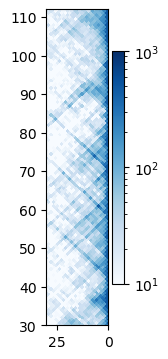

In [24]:
import logging

fig = plt.figure(figsize=(1, 4))
ax = fig.add_gridspec(top=0.9, right=0.9).subplots()

def get_rec_mat(cmat, chrom, start, end, height=50):
    resolution = cmat.binsize
    if chrom not in cmat.chromsizes:
         logging.error(chrom, 'not a chrom in the cool matrix') 
    maxChromL = cmat.chromsizes[chrom]
    
    # ------
    start_mat = start - height*resolution
    if start_mat < 0:
        start_mat = 0
    end_mat = end + height*resolution
    if end_mat > maxChromL:
        end_mat = maxChromL
    
    # ------
    df = cmat.matrix(balance=False).fetch("{0}:{1}-{2}".format(chrom, start_mat, end_mat))
    return df

height = 30
t_df = get_rec_mat(HaCaT1_cMat, 'chr17', 41748103, 42553709, height)

ymaxR = np.percentile(t_df, 99)
t_df = t_df.astype(float)
t_df[t_df>ymaxR] = ymaxR
t_df[t_df==0.0]=np.nan

                            
N = t_df.shape[1]

# Transformation matrix for rotating the heatmap.
A = np.array([(y, x) for x in range(N, -1, -1) for y in range(N + 1)])
t = np.array([[1,0.5], [-1,0.5]])
A = np.dot(A, t)


#C = np.triu(t_df)
C = t_df

#axes.set_xticks([])
#ax.set_yticks([])

# Plot the correlation heatmap triangle.
X = A[:, 1].reshape(N + 1, N + 1)
Y = A[:, 0].reshape(N + 1, N + 1)

#caxes = pl.pcolormesh(X, Y, np.fliplr(C), axes=axes, cmap=cmap, norm=norm)

minrange=10
maxrange=1000
midnorm = MidpointNormalize(vmin=minrange, vcenter=210, vmax=maxrange)

import matplotlib.colors as colors
norm = colors.LogNorm()

#norm=MidpointNormalize(midpoint=0,vmin=-1, vmax=1)
caxes = ax.pcolormesh(Y, X, np.flipud(C), cmap='Blues', edgecolor='none', norm=norm, clim=(minrange, maxrange) , snap=True, linewidth=.001)
plt.colorbar(caxes)

ax.set_ylim(height, N-height)
ax.set_xlim(right=0, left=height)

In [25]:
length = pd.read_table("/annoroad/data1/bioinfo/PMO/yuanzan/project/comm/commander_test/hic/jumoyu/len.sort.txt", header=None)

In [26]:
length[1] = length[0].cumsum()

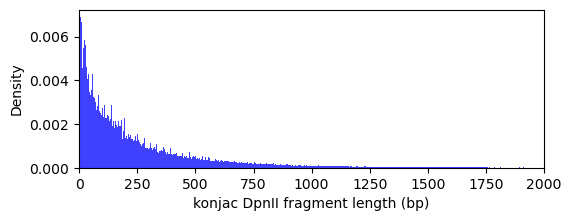

In [27]:
fig = plt.figure(figsize=(6, 2))
ax = fig.add_gridspec(top=0.9, right=0.9).subplots()

ax.hist(length[0], 5000, density=True, facecolor='b', alpha=0.75)
ax.set_xlim(0,2000)
ax.set_xlabel("konjac DpnII fragment length (bp)")
ax.set_ylabel("Density")
plt.savefig("density.pdf")

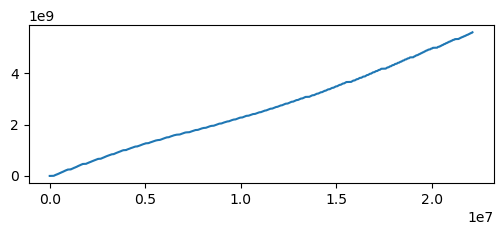

In [28]:
fig = plt.figure(figsize=(6, 2))
ax = fig.add_gridspec(top=0.9, right=0.9).subplots()

ax.plot(length[1])


In [1]:
for i in [1,2,3,4,5,6]:
    if i>3:
        next
    else:
        print(i)

1
2
3


In [29]:
HaCaT1_cMat.chromsizes['chr1']

249250621

In [30]:
#help(HaCaT1_cMat)

In [31]:
HaCaT1_cMat.matrix(balance=False).fetch('chr1', 'chr2')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [32]:
def track_view_7(cmats, cmats_labels, loop_bed1, loop_bed2, bed12, 
                 bws, bwLabels, trackColors, pc1_bws, pc1_bw_labels, chrom, start, end, markgene):
    plt.style.use("fivethirtyeight")

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_gridspec(top=0.9, right=0.9).subplots()
    
    ax.set(xticklabels=[], yticklabels=[])
    
    plot_mergeCM(ax, cmats, cmats_labels, "chr"+chrom, start, end)
  
    # bws
    
    
    ax_loop = ax.inset_axes([0, -0.1, 1, 0.1])
    ax_loop2 = ax.inset_axes([0, -0.2, 1, 0.1])
    
    track_y = -0.2
    track_height = 0.05
    
    plot_loop(loop_bed1, ax_loop, chrom, start, end, color='#66AC84')
    plot_loop(loop_bed2, ax_loop2, chrom, start, end, color='red')
    
    
    
    ax_loop.set_ylabel('HaCaT1', horizontalalignment='right',verticalalignment='center', rotation=0)
    ax_loop2.set_ylabel('WT', horizontalalignment='right',verticalalignment='center', rotation=0)
    
    for index, value in enumerate(bws):
        track_y = track_y-track_height
        ax_track = ax.inset_axes([0, track_y, 1, track_height])
        plot_bwTrack3(ax_track, value, bwLabels[index],'chr{0}'.format(chrom), start, end, bins=600,fl='%0.2f',color=trackColors[index], yminx=10, ymaxx=98)

    for index, value in enumerate(pc1_bws):
        track_y = track_y-track_height
        ax_track = ax.inset_axes([0, track_y, 1, track_height])
        plot_compartment(value, ax_track, "chr"+chrom, start, end, pc1_bw_labels[index], xticklabel=False, Acolor="#3271B2", Bcolor="#FBD23C")
        ax_track.set_ylabel("")
        
    # gene

    track_y = track_y-0.5
    ax_gene = ax.inset_axes([0, track_y, 1, 0.5])
    plot_gene(ax_gene, bed12, "chr" + chrom, start, end, line=8, gene_col=[markgene],fontszie=8)
    
    

    #fig.tight_layout() 
    #fig.savefig("/home/tad/hepg2_tracks/" + filename)
   
from matplotlib.backends.backend_pdf import PdfPages


   


In [33]:

mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
os.getcwd()

FileNotFoundError: [Errno 2] No such file or directory

/tmp/ipykernel_12405/4261829971.py:309: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu_r").copy()
  cmap.set_bad(color=bad_color, alpha=alpha)
/tmp/ipykernel_12405/4261829971.py:310: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu_r").copy()
  cmap.set_over(color=over_color, alpha=alpha)
/tmp/ipykernel_12405/4261829971.py:311: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modi

no max min range
maxrange: 479.900000000016 minrange: 1.0
no max min range
maxrange: 373.0 minrange: 1.0
looop num: (14, 8)


/tmp/ipykernel_12405/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_12405/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (4, 8)
111111 0 1.27
111111 0 1.27
111111 0 1
111111 0 1
111111 0 200
111111 0 200
43


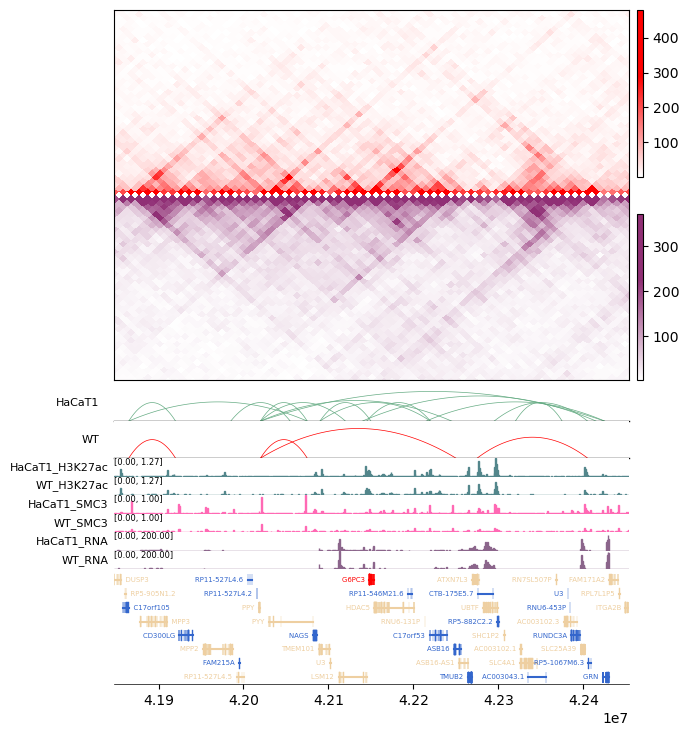

In [67]:
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
fruitpunch2 = sns.blend_palette(['white', 'blue'], as_cmap=True)
cmap4 = LinearSegmentedColormap.from_list('custom1', 
                                             [(0, 'white'),
                                              (0.6, 'r'),
                                              (0.7, 'r'),
                                              (1, 'r')], N=256)

cmap5 = LinearSegmentedColormap.from_list('custom2', 
                                             [(0, 'white'),
                                              (0.6, '#902F75'),
                                              (0.7, '#902F75'),
                                              (1, '#902F75')], N=256)

colorC(cname='RdBu_r')

def track_view_8(cmats, cmats_labels, loop_bed1, loop_bed2, bed12, 
                 bws, bwLabels, trackColors, chrom, start, end, markgene, filename=None):
    

    #fig = plt.figure(figsize=(8, 5))
    fig, ax = plt.subplots(1, 1, figsize=(7,12), facecolor='w' )
    #plt.style.use("seaborn-colorblind")
    #ax = fig.add_gridspec(top=0.9, right=0.9).subplots()
    
    ax.set(xticklabels=[], yticklabels=[])
    
    #plot_mergeCM(ax, cmats, cmats_labels, "chr"+chrom, start, end)
    region = "chr{0}:{1}-{2}".format(chrom, start, end)
    cmat = subsetCisRegion(clr=cmats[0], region=region, extend=50)
    cmat2 = subsetCisRegion(clr=cmats[1], region=region, extend=50)
    # bws
    mapC(mat=cmat, mat2=cmat2, cmap=[cmap4, cmap5], ax=ax, map_type='rectangle', height=50, symmetric=False)
    #mapC(mat=cmat, mat2=cmat2, cmap=[cmap4, cmap5], ax=ax, map_type='triangle', height=0, symmetric=False)

    
    
    ax_loop = ax.inset_axes([0, -0.11, 1, 0.1])
    ax_loop2 = ax.inset_axes([0, -0.21, 1, 0.1])
    
    track_y = -0.21
    track_height = 0.05
    
    plot_loop(loop_bed1, ax_loop, chrom, start, end, color='#66AC84')
    plot_loop(loop_bed2, ax_loop2, chrom, start, end, color='red')
    
    
    
    ax_loop.set_ylabel('HaCaT1', horizontalalignment='right',verticalalignment='center', rotation=0)
    ax_loop2.set_ylabel('WT', horizontalalignment='right',verticalalignment='center', rotation=0)
    
    for index, value in enumerate(bwLabels):
        track_y = track_y-track_height
        ax_track = ax.inset_axes([0, track_y, 1, track_height])
        
        ymin=None
        ymax=None
        """
        if value in ["HaCaT1_SMC3", "WT_SMC3"]:
            ymin = 0
            ymax = 1
        if value in ["HaCaT1_H3K27ac", "WT_H3K27ac"]:
            ymin = 0
            ymax = 1.27
        if value in ["HaCaT1_RNA", "WT_RNA"]:
            ymin = 0
            ymax = 200
        """
        plot_bwTrack3(ax_track, bws[index], bwLabels[index],'chr{0}'.format(chrom), start, end, bins=600,fl='%0.2f',color=trackColors[index], ymin=ymin, ymax=ymax)
        '''
        if  value in ["HaCaT1_SMC3", "WT_SMC3"]:
            ax_track.set_ylim(0,0.5)
        if  value in ["HaCaT1_H3K27ac", "WT_H3K27ac"]:
            ax_track.set_ylim(0.0, 0.55)
        if  value in ["HaCaT1_RNA", "WT_RNA"]:
            ax_track.set_ylim(0, 60)
        '''
    """
    for index, value in enumerate(pc1_bws):
        track_y = track_y-track_height
        ax_track = ax.inset_axes([0, track_y, 1, track_height])
        plot_compartment(value, ax_track, "chr"+chrom, start, end, pc1_bw_labels[index], xticklabel=False, Acolor="#3271B2", Bcolor="#FBD23C")
        ax_track.set_ylabel("")
    """
    # gene

    track_y = track_y-0.31
    ax_gene = ax.inset_axes([0, track_y, 1, 0.3])
    plot_gene(ax_gene, bed12, "chr" + chrom, start, end, line=8, gene_col=[markgene],fontszie=5)
    
    

    fig.tight_layout() 
    if filename != None:
        fig.savefig(filename)
        
def track_view_track(bed12, 
                 bws, bwLabels, trackColors, chrom, start, end, markgene, filename=None):
    

    #fig = plt.figure(figsize=(8, 5))
    fig, ax = plt.subplots(1, 1, figsize=(7,1) )
    plt.style.use("seaborn-colorblind")
    #ax = fig.add_gridspec(top=0.9, right=0.9).subplots()
    
    ax.set(xticklabels=[], yticklabels=[])
    
    #plot_mergeCM(ax, cmats, cmats_labels, "chr"+chrom, start, end)
    track_y = 0
    track_height = 0.8
    
    for index, value in enumerate(bwLabels):
        track_y = track_y-track_height
        ax_track = ax.inset_axes([0, track_y, 1, track_height])
        plot_bwTrack3(ax_track, bws[index], bwLabels[index],'chr{0}'.format(chrom), start, end, bins=10,fl='%0.2f',color=trackColors[index], yminx=10, ymaxx=99)
        """
        if  value in ["HaCaT1_SMC3", "WT_SMC3"]:
            ax_track.set_ylim(0,0.44)
            ax.text(0, 0.44, "[{0}, {1}]".format(fl % 0, fl % 0.44), verticalalignment="top", fontsize=6)
        if  value in ["HaCaT1_H3K27ac", "WT_H3K27ac"]:
            ax_track.set_ylim(0.03, 0.6)
            ax.text(0, 0.6, "[{0}, {1}]".format(fl % 0.03, fl % 0.6), verticalalignment="top", fontsize=6)
        if  value in ["HaCaT1_RNA", "WT_RNA"]:
            ax_track.set_ylim(0, 60)
            ax.text(0, 60, "[{0}, {1}]".format(fl % 0, fl % 60), verticalalignment="top", fontsize=6)
        """
    """
    for index, value in enumerate(pc1_bws):
        track_y = track_y-track_height
        ax_track = ax.inset_axes([0, track_y, 1, track_height])
        plot_compartment(value, ax_track, "chr"+chrom, start, end, pc1_bw_labels[index], xticklabel=False, Acolor="#3271B2", Bcolor="#FBD23C")
        ax_track.set_ylabel("")
    """
    # gene

    track_y = track_y-2
    ax_gene = ax.inset_axes([0, track_y, 1, 2])
    plot_gene(ax_gene, bed12, "chr" + chrom, start, end, line=1, gene_col=[markgene],fontszie=5)
    ax_gene.set_ylim(0, 800)
    

    fig.tight_layout() 
    if filename != None:
        fig.savefig(filename)
   
def track_view_track(bed12, 
                 bws, bwLabels, trackColors, chrom, start, end, markgene, filename=None):
    

    #fig = plt.figure(figsize=(8, 5))
    fig, ax = plt.subplots(4, 1, figsize=(7,2) )
    plt.style.use("seaborn-colorblind")
    
    for index, value in enumerate(bwLabels):
        plot_bwTrack3(ax[index], bws[index], bwLabels[index],'chr{0}'.format(chrom), start, end, bins=400,fl='%0.2f',color=trackColors[index], yminx=10, ymaxx=99)
        
    ax[0].set_ylim(0.03, 3.14)
    ax[1].set_ylim(0.03, 3.14)
    
    ax[2].set_ylim(0, 1400)
    ax[3].set_ylim(0, 1400)
    
    ax_gene = ax[0].inset_axes([0, 1, 1, 1])
    plot_gene(ax_gene, bed12, "chr" + chrom, start, end, line=3, gene_col=[markgene],fontszie=8)
    ax_gene.axis('off')
    

    fig.tight_layout() 
    if filename != None:
        fig.savefig(filename)

        
        

bws2 = [HaCaT1_H3K27ac, WT_H3K27ac, 
       HaCaT1_SMC3, WT_SMC3]

bwLabels2= ["HaCaT1_H3K27ac", "WT_H3K27ac", 
           "HaCaT1_SMC3", "WT_SMC3"]

#pc1_bws = [HaCaT1_PC1, WT_PC1]
#pc1_bw_labels = ["HaCaT1_PC1", "WT_PC1"]

trackColors2 = [my23colors[0], my23colors[0],
               my23colors[12], my23colors[12]
              ]


bws4 = [HaCaT1_H3K27ac, WT_H3K27ac, 
       HaCaT1_RNA, WT_RNA]
bwLabels4= ["HaCaT1_H3K27ac", "WT_H3K27ac", 
           "HaCaT1_RNA", "WT_RNA"]
trackColors4 = [my23colors[0], my23colors[0],
               my23colors[12], my23colors[12]
              ]


#pc1_bws = [HaCaT1_PC1, WT_PC1]
#pc1_bw_labels = ["HaCaT1_PC1", "WT_PC1"]

trackColors2 = [my23colors[0], my23colors[0],
               my23colors[12], my23colors[12]
              ]


gene_name = "G6PC3"
chrom, start, end = gene_range(bed13, gene_name, ranges=300000)

dirr = "/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-003/std/result/fanxuning/commander_test/tongji-2/fig3"
track_view_8([HaCaT1_cMat, WT_cMat], ["HaCaT1_cMat", "WT_cMat"], HaCaT1_loop, WT_loop, bed13, 
                 bws3, bwLabels3, trackColors3, 
                 chrom=chrom, start=int(start), end=int(end), markgene = gene_name, filename="{0}/{1}.pdf".format(dirr, gene_name))



In [46]:
os.getcwd()

'/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-003/std/result/fanxuning/commander_test/hg38/tongji-2'

In [85]:
bws4 = [HaCaT1_H3K27ac, WT_H3K27ac, 
       HaCaT1_SMC3, WT_SMC3, 
          HaCaT1_RAD21, WT_RAD21, 
        HaCaT1_RNA, WT_RNA]

bwLabels4= ["HaCaT1_H3K27ac", "WT_H3K27ac", 
           "HaCaT1_SMC3", "WT_SMC3",
            "HaCaT1_RAD21", "WT_RAD21", 
            "HaCaT1_RNA", "WT_RNA"
           ]

trackColors4 = [my23colors[0], my23colors[0],
               my23colors[12], my23colors[12],
                my23colors[15], my23colors[15],
                my23colors[8], my23colors[8]
              ]

/tmp/ipykernel_12405/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (10, 8)
111111 0.0 0.57
111111 0.0 0.57
111111 0.0 0.58
111111 0.008946238597880431 0.58
111111 0 0.2
111111 0 0.2
111111 0.0 50
111111 0.0 50
27


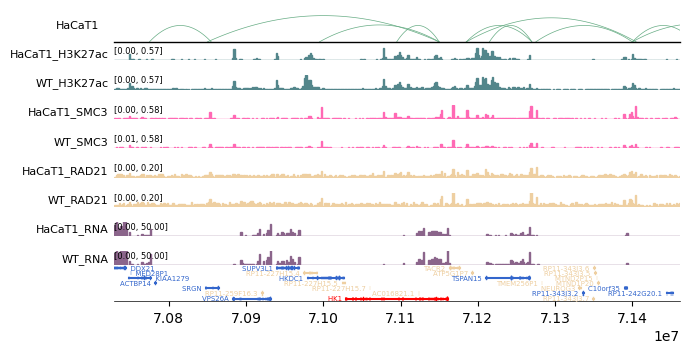

In [90]:
def track_view_track33(loop_bed1, loop_bed2, bed12, 
                 bws, bwLabels, trackColors, chrom, start, end, markgene, filename=None):
    

    #fig = plt.figure(figsize=(8, 5))
    fig, ax = plt.subplots(8, 1, figsize=(7,5) )
    plt.style.use("seaborn-colorblind")
    
    loop_ax1 = ax[0].inset_axes([0, 1.3, 1, 2.3])
    #loop_ax2 = ax[0].inset_axes([0, 3.3, 1, 2.3])
    
    plot_loop(loop_bed1, loop_ax1, chrom, start, end, color='#66AC84')
    #plot_loop(loop_bed2, loop_ax2, chrom, start, end, color='red')
    loop_ax1.set_ylabel('HaCaT1', horizontalalignment='right',verticalalignment='center', rotation=0)
    #loop_ax2.set_ylabel('WT', horizontalalignment='right',verticalalignment='center', rotation=0)
    
    
    for index, value in enumerate(bwLabels):
        ymin=None
        ymax=None
        if bwLabels[index] in ["HaCaT1_H3K27ac", "WT_H3K27ac"]:
            ymax = 0.57
        if bwLabels[index] in ["HaCaT1_SMC3", "WT_SMC3"]:
            ymax = 0.58
        if bwLabels[index] in ["HaCaT1_RAD21", "WT_RAD21"]:
            ymin=0
            ymax = 0.2
        if bwLabels[index] in ["HaCaT1_RNA", "WT_RNA"]:
            ymax = 50
        plot_bwTrack3(ax[index], bws[index], bwLabels[index],'chr{0}'.format(chrom), start, end, bins=400,fl='%0.2f',color=trackColors[index], ymin=ymin, ymax=ymax)
    
    
    ax_gene = ax[len(ax)-1].inset_axes([0, -2.5, 1, 2.5])
    plot_gene(ax_gene, bed12, "chr" + chrom, start, end, line=7, gene_col=[markgene],fontszie=5)
    #ax_gene.axis('off')
    

    fig.tight_layout() 
    if filename != None:
        fig.savefig(filename)
        
gene_name = "HK1"
chrom, start, end = gene_range(bed13, gene_name, ranges=300000)

        
track_view_track33(HaCaT1_loop, WT_loop, bed13, 
             bws4, bwLabels4, trackColors4, 
             chrom=chrom, start=int(start), end=int(end), markgene = gene_name)

#, filename="{0}.pdf".format(gene_name)

In [ ]:
os.chdir('/annoroad/data1/bioinfo/PROJECT/big_Commercial/Cooperation/B_TET/B_TET-003/std/result/fanxuning/commander_test/tongji-2/fig3')

for gene_name in ["FBP1" ,"G6PC3",   "PCAT7",   "PKLR",    "PKM" ] : 
#gene_name = "LCN2"
    chrom, start, end = gene_range(bed13, gene_name, ranges=300000)

    track_view_8([HaCaT1_cMat, WT_cMat], ["HaCaT1_cMat", "WT_cMat"], HaCaT1_loop, WT_loop, bed13, 
                     bws2, bwLabels2, trackColors2, 
                     chrom=chrom, start=int(start), end=int(end), markgene = gene_name, filename="{0}.pdf".format(gene_name))
    
    
    

In [ ]:
#pdf_pages2 = PdfPages('loop_track_1.pdf')
pos_genes = ["ALDOA",   "ALDOB",   "ALDOC",   "EDARADD", "ENO1" , 
       "ENO2",   "ENO3",    "ENO4" ,   "HK1",     "HK2"  ,  
       "HK3",     "HKDC1" , "PCK1" ,   "PCK2" ,   "PFKL" ,   "PFKM" ,   "PFKP"]


for gene_name in pos_genes:
    chrom, start, end = gene_range(bed13, gene_name, ranges=300000)
    track_view_8([HaCaT1_cMat, WT_cMat], ["HaCaT1_cMat", "WT_cMat"], HaCaT1_loop, WT_loop, bed13, 
                 bws2, bwLabels2, trackColors2, 
                 chrom=chrom, start=int(start), end=int(end), markgene = gene_name, filename="{0}.pdf".format(gene_name))

#pdf_pages2.close()

In [549]:
IL17_genes = pd.read_table("IL17_genes_exp.csv", sep="\t", header=0, index_col=0)
IL17_genes = IL17_genes.columns.to_list()
del IL17_genes[0]

In [550]:
IL17_genes

['S100A7',
 'CXCL3',
 'CXCL1',
 'S100A9',
 'S100A8',
 'S100A7A',
 'IL17C',
 'MUC5AC',
 'TNF',
 'CCL17',
 'CXCL8',
 'LCN2',
 'CXCL5',
 'CSF2',
 'CXCL6',
 'JUND',
 'CXCL2',
 'JUN',
 'PTGS2',
 'CCL20',
 'MUC5B',
 'IL1B',
 'IL5',
 'TNFAIP3',
 'DEFB4B',
 'IL17B']

maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (17, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (12, 8)
41
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (15, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (14, 8)
20
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (11, 8)
looop num: (11, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


20
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (15, 8)
looop num: (10, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


37
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (17, 8)
looop num: (12, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


39
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (17, 8)
looop num: (12, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


39
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (13, 8)
looop num: (2, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


29
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (2, 8)
looop num: (0, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


17
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (24, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (12, 8)
79
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (20, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (12, 8)
26


IndexError: index 0 is out of bounds for axis 0 with size 0

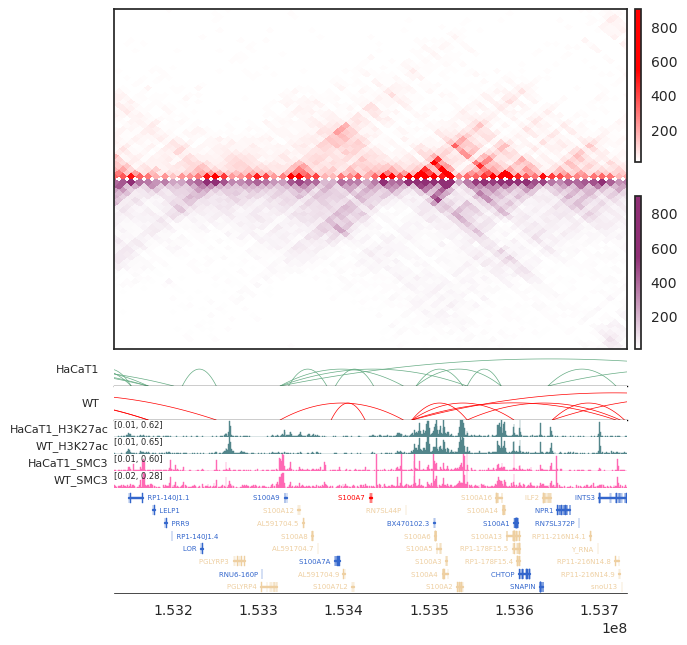

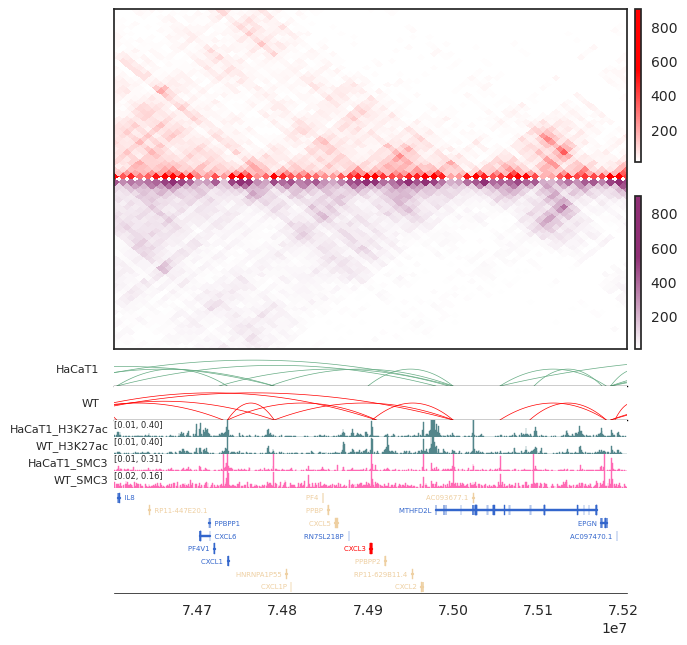

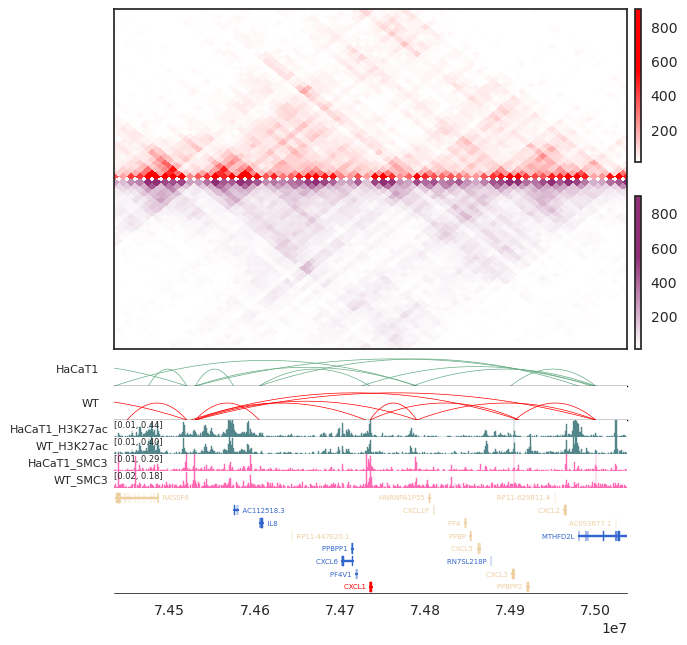

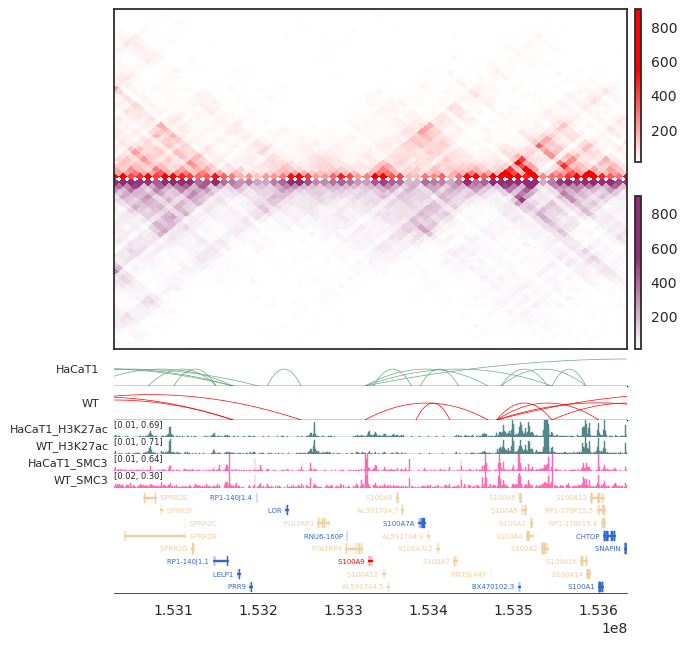

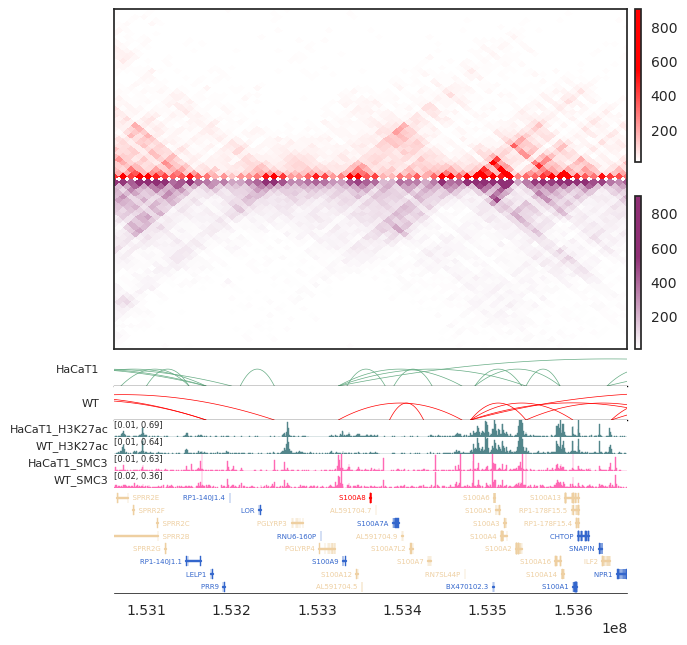

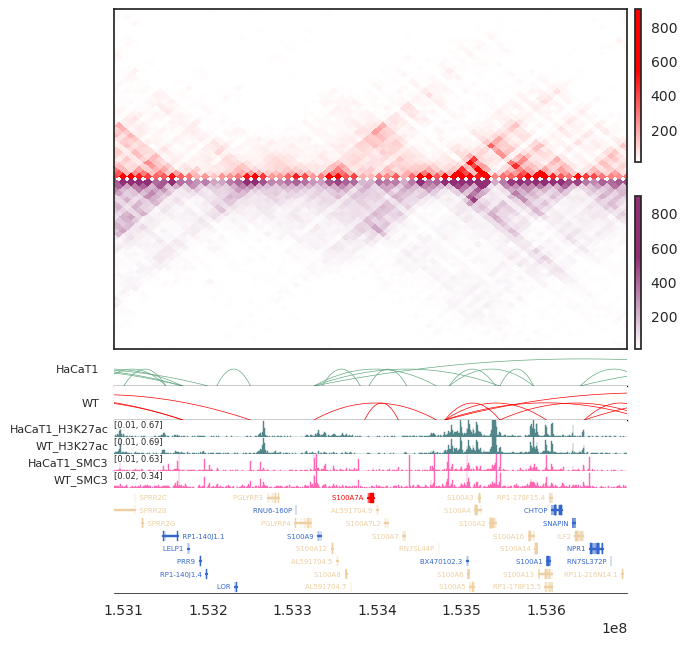

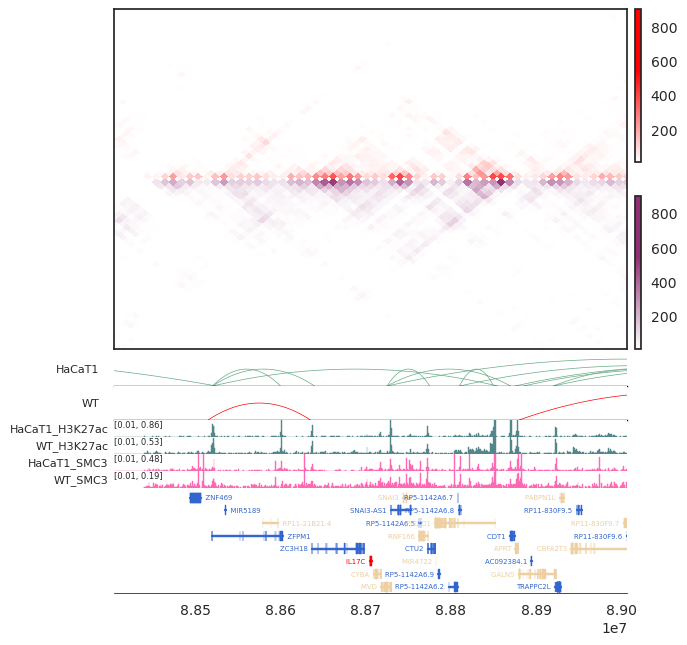

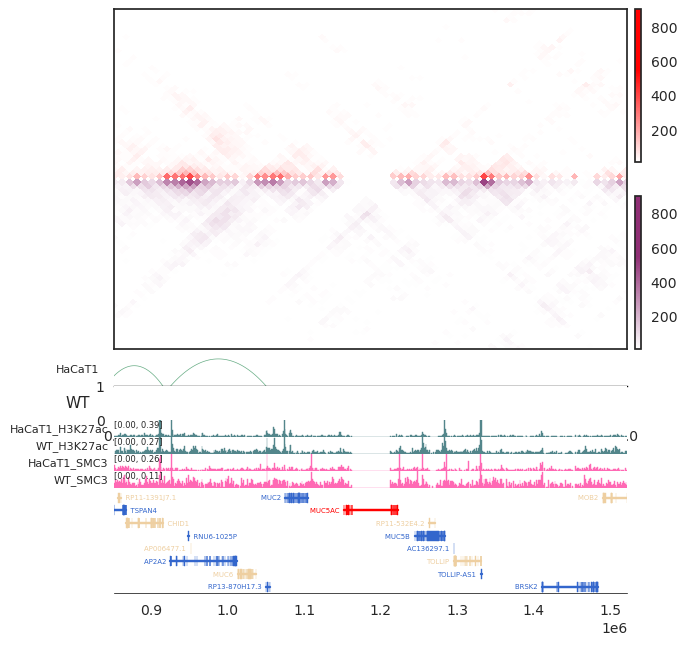

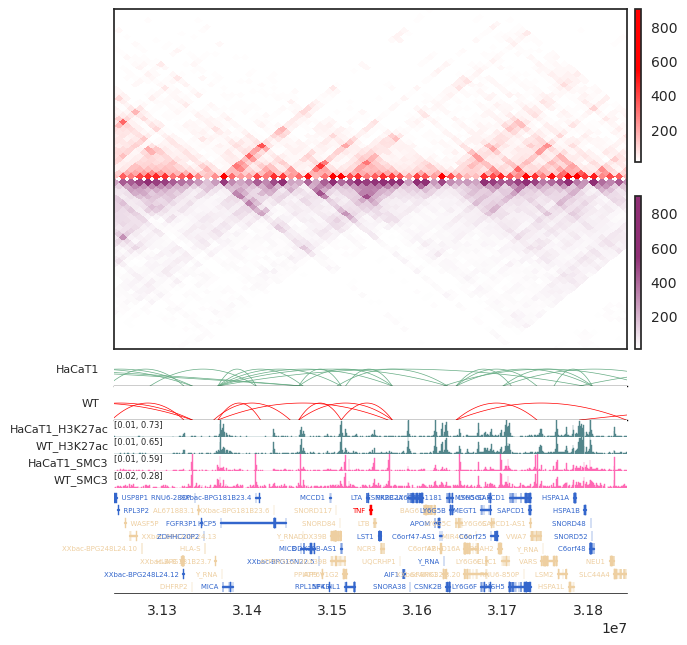

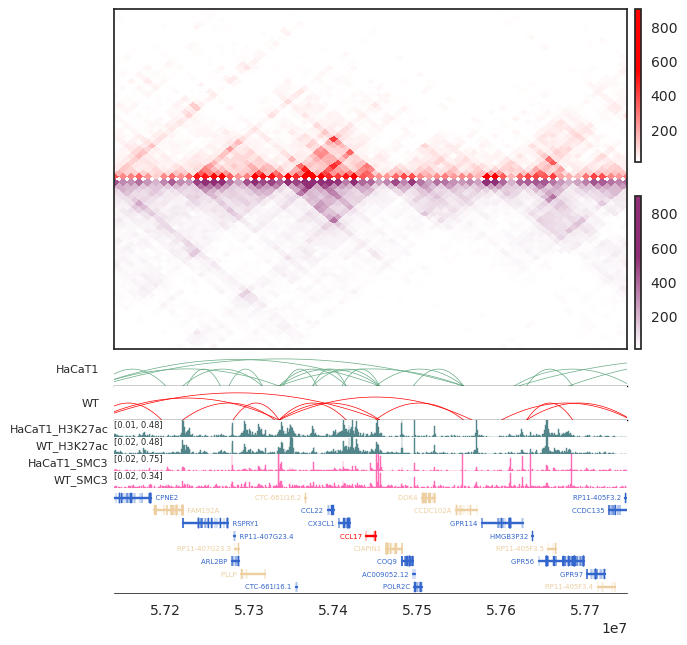

In [552]:


for gene_name in IL17_genes:
    chrom, start, end = gene_range(bed13, gene_name, ranges=300000)
    track_view_8([HaCaT1_cMat, WT_cMat], ["HaCaT1_cMat", "WT_cMat"], HaCaT1_loop, WT_loop, bed13, 
                 bws2, bwLabels2, trackColors2, 
                 chrom=chrom, start=int(start), end=int(end), markgene = gene_name, filename="{0}.pdf".format(gene_name))


maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (24, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (13, 8)
41
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (12, 8)
looop num: (11, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


19
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (9, 8)
looop num: (6, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


21
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (11, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (11, 8)
20
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (17, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (11, 8)
39
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (17, 8)
looop num: (16, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


19
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (14, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (7, 8)
19
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (10, 8)
looop num: (11, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


12
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (4, 8)
looop num: (5, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


13
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (1, 8)
looop num: (0, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


15
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (21, 8)
looop num: (16, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


26
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (4, 8)
looop num: (1, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


24
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (19, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (15, 8)
12
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (2, 8)
looop num: (0, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


42
maxrange: 900 minrange: 2
maxrange: 900 minrange: 2
looop num: (20, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (15, 8)
22


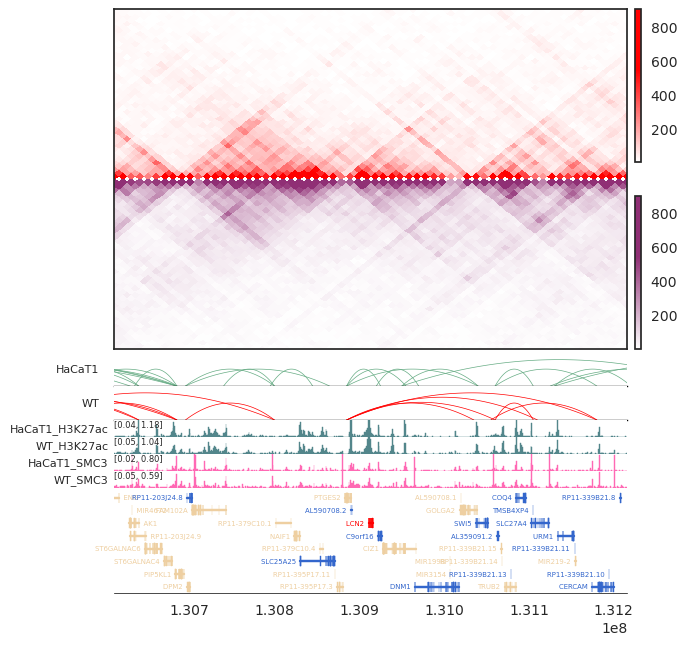

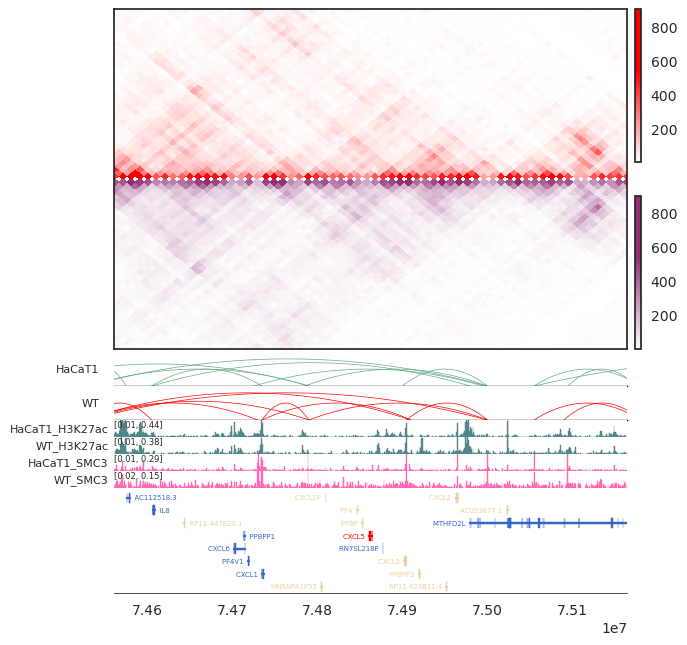

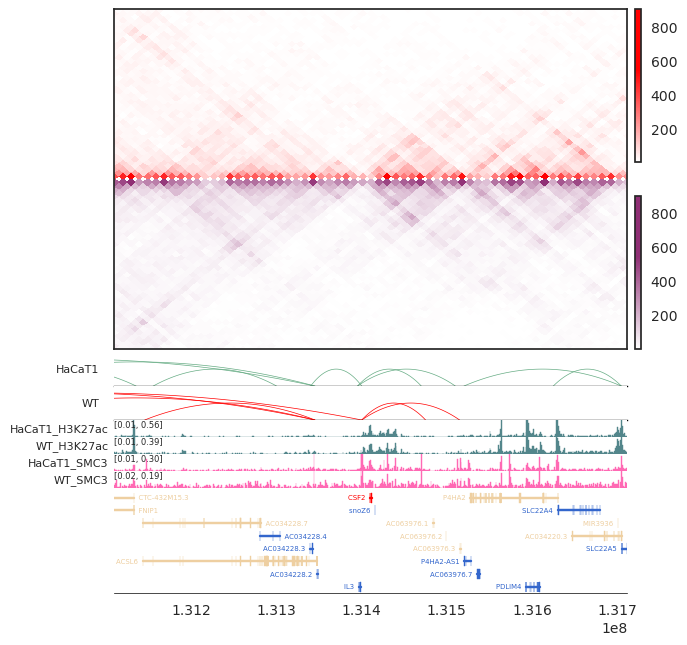

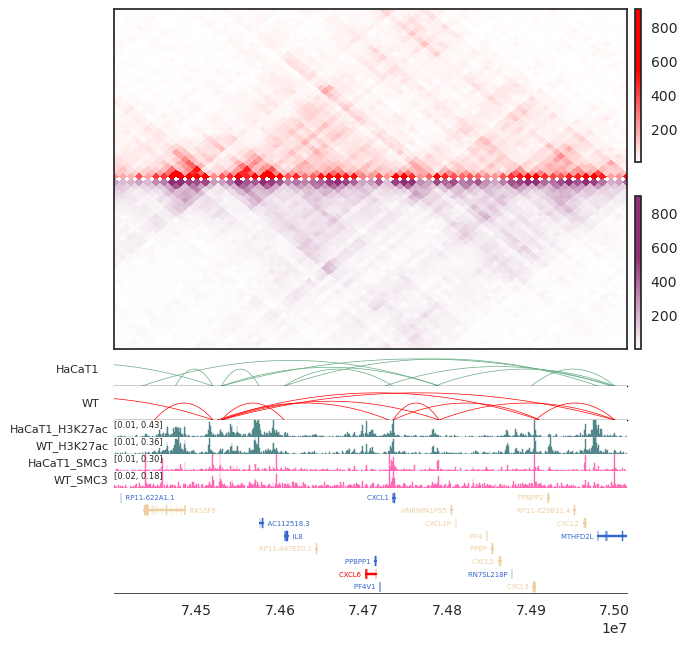

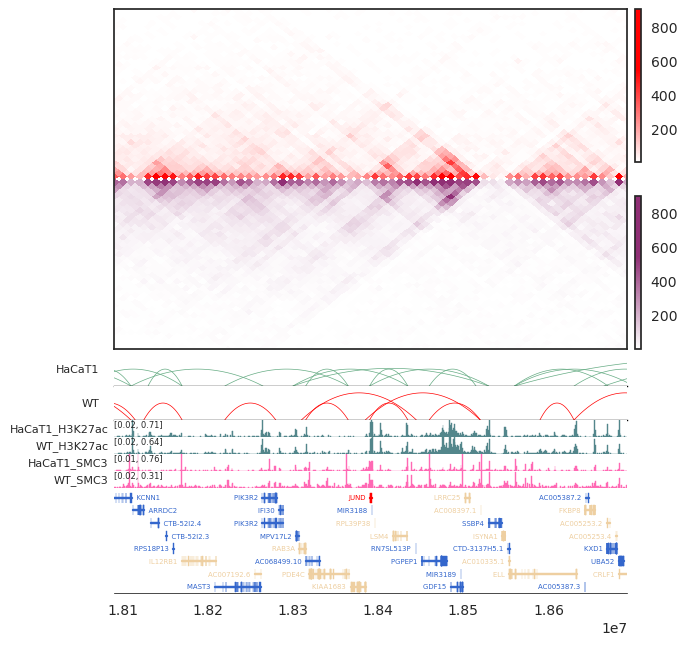

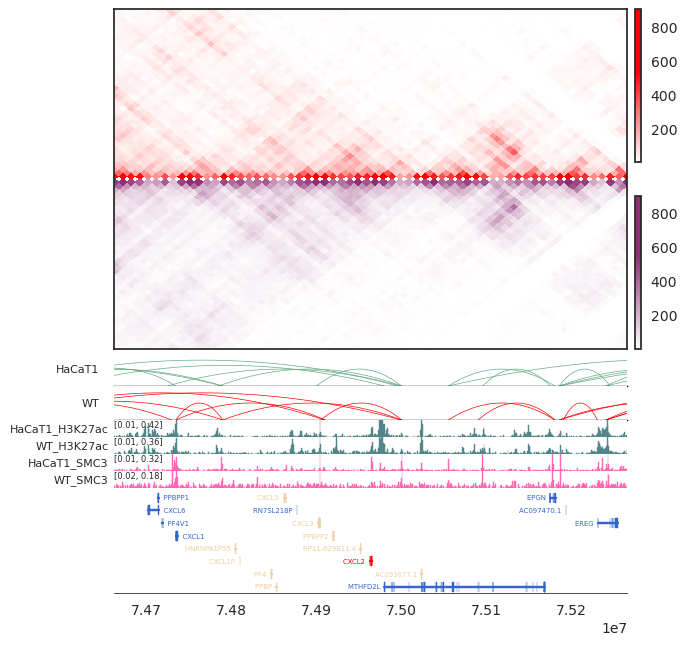

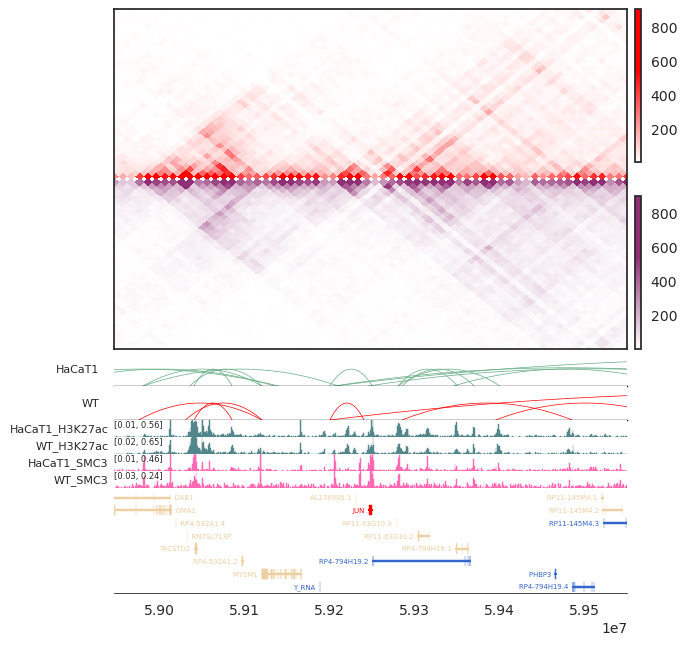

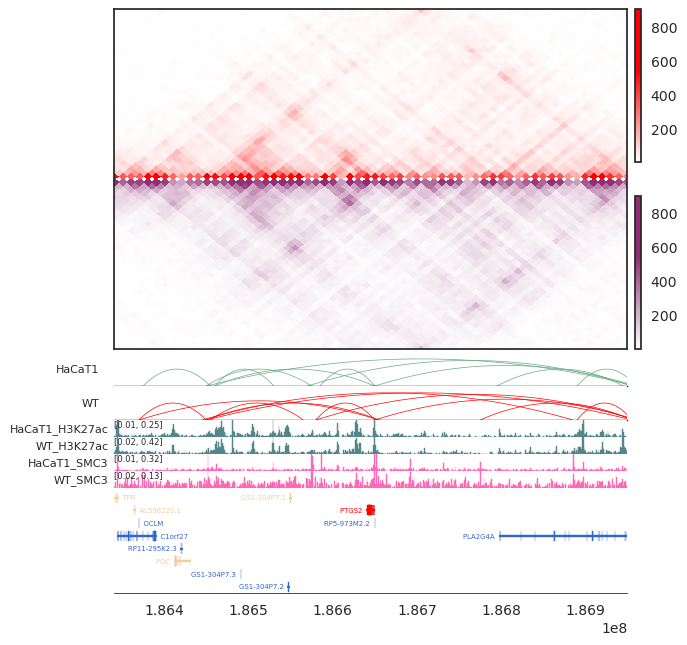

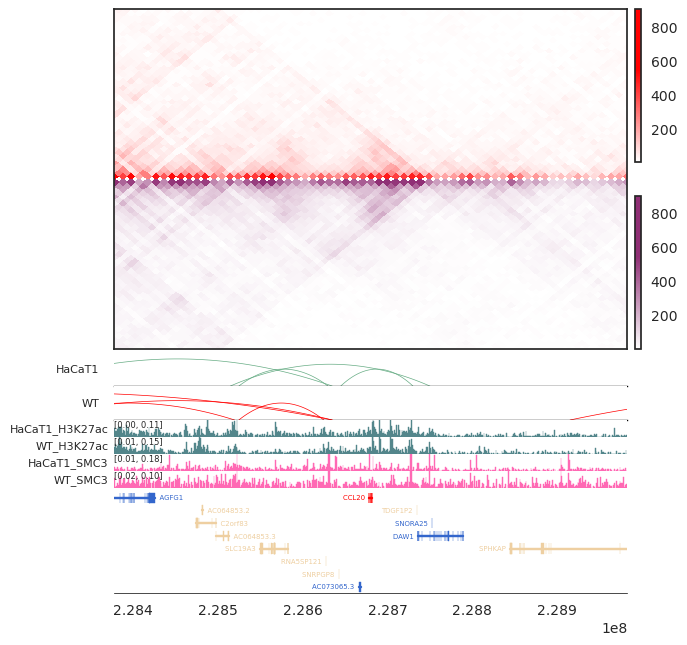

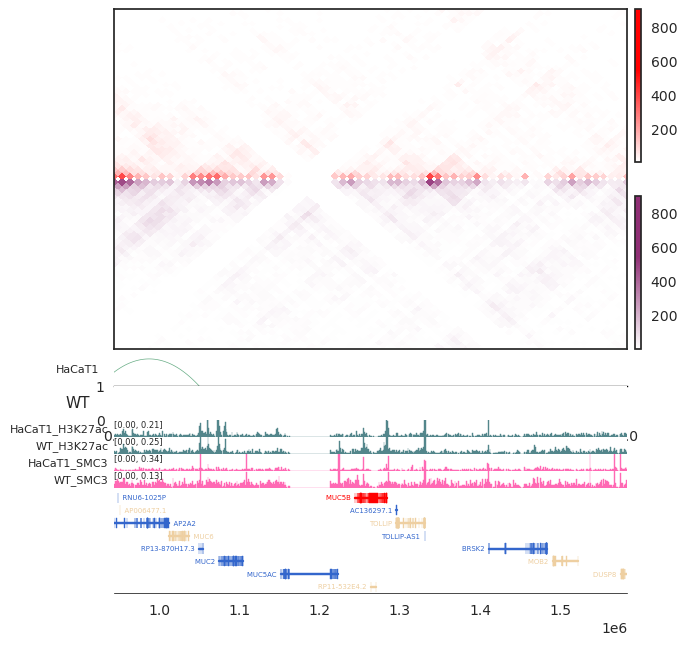

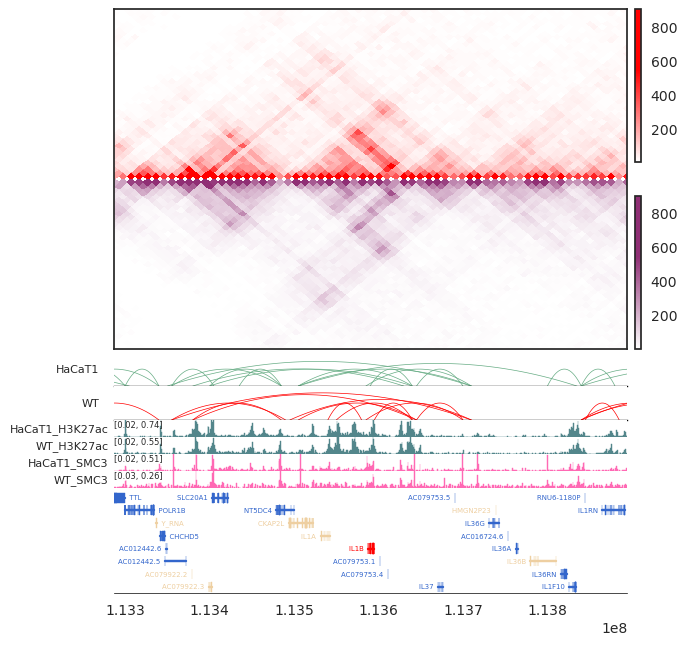

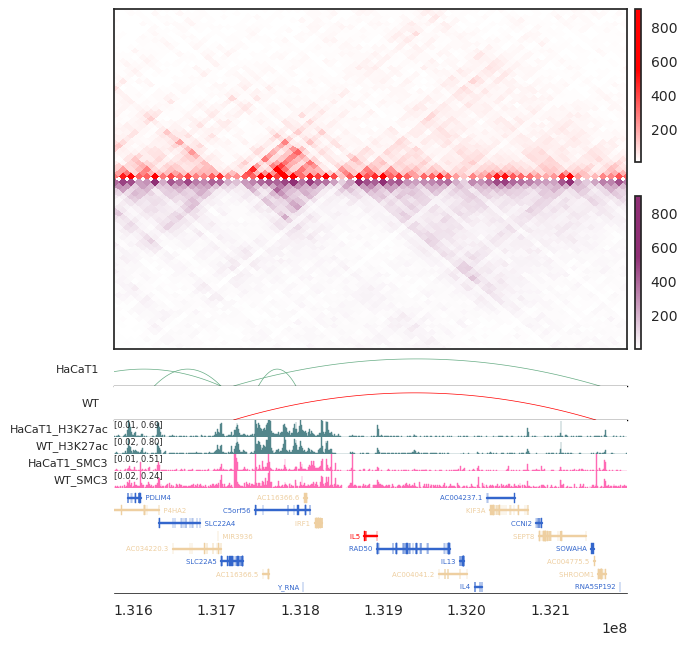

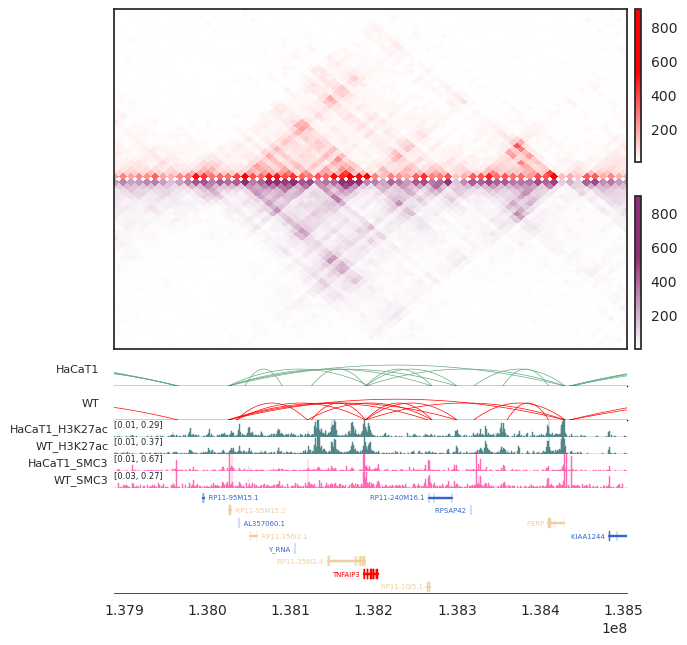

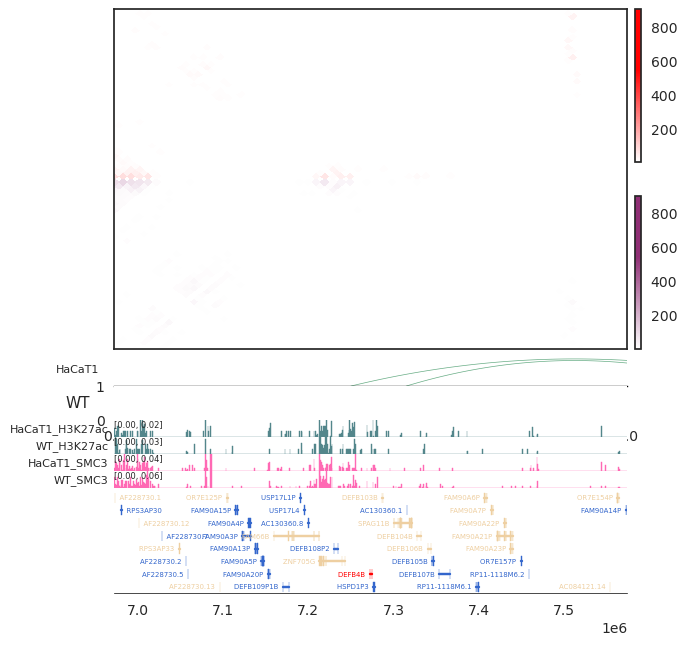

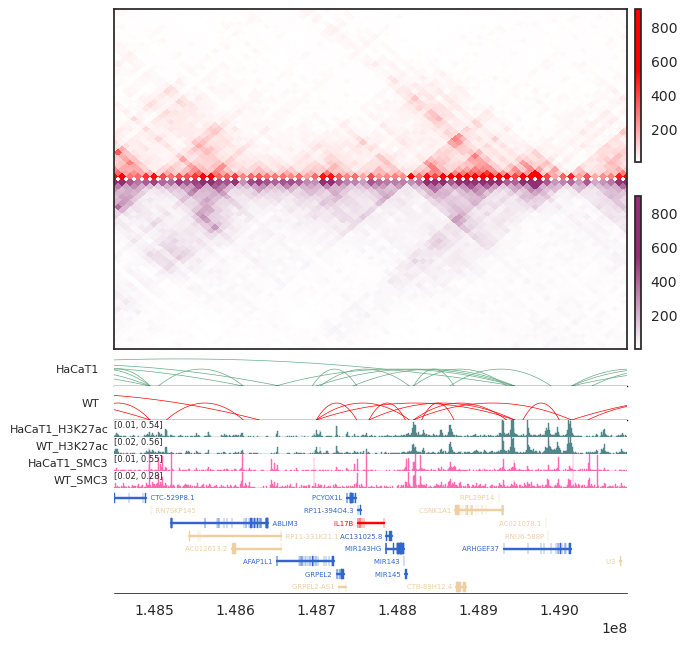

In [561]:
il17s = ['LCN2',
 'CXCL5',
 'CSF2',
 'CXCL6',
 'JUND',
 'CXCL2',
 'JUN',
 'PTGS2',
 'CCL20',
 'MUC5B',
 'IL1B',
 'IL5',
 'TNFAIP3',
 'DEFB4B',
 'IL17B']

for gene_name in il17s:
    chrom, start, end = gene_range(bed13, gene_name, ranges=300000)
    track_view_8([HaCaT1_cMat, WT_cMat], ["HaCaT1_cMat", "WT_cMat"], HaCaT1_loop, WT_loop, bed13, 
                 bws2, bwLabels2, trackColors2, 
                 chrom=chrom, start=int(start), end=int(end), markgene = gene_name, filename="{0}.pdf".format(gene_name))


In [42]:
bws = [HaCaT1_H3K27ac, WT_H3K27ac, 
       HaCaT1_CTCF, WT_CTCF, 
       HaCaT1_RAD21, WT_RAD21,
       HaCaT1_SMC3, WT_SMC3,
       HaCaT1_RNA, WT_RNA]

bwLabels= ["HaCaT1_H3K27ac", "WT_H3K27ac", 
           "HaCaT1_CTCF", "WT_CTCF", 
           "HaCaT1_RAD21", "WT_RAD21",
           "HaCaT1_SMC3", "WT_SMC3"]

#pc1_bws = [HaCaT1_PC1, WT_PC1]
pc1_bw_labels = ["HaCaT1_PC1", "WT_PC1"]

trackColors = [my23colors[0], my23colors[0], 
               my23colors[8], my23colors[8], 
               my23colors[10], my23colors[10], 
               my23colors[2], my23colors[2],
               my23colors[12], my23colors[12]
              ]


def gene_range(bed12, gene, ranges=100000):
    bed12 = bed12[bed12["name"]==gene]
    gene_i = bed12.index[0]
    return bed12.loc[gene_i,"chrom"].lstrip("chr"), bed12.loc[gene_i,"start"]-ranges, bed12.loc[gene_i,"end"]+ranges
    
"""
pdf_pages2 = PdfPages('loop_track_1.pdf')

genes = ["FBP1","G6PC3", "PKLR", "PKM", "LPP"]

for gene_name in genes:
    chrom, start, end = gene_range(bed13, gene_name, ranges=500000)


    track_view_7([HaCaT1_cMat, WT_cMat], ["HaCaT1_cMat", "WT_cMat"], HaCaT1_loop, WT_loop, bed13, 
                 bws, bwLabels, trackColors, pc1_bws, pc1_bw_labels,
                 chrom=chrom, start=int(start), end=int(end), markgene = gene_name)

pdf_pages2.close()
"""

'\npdf_pages2 = PdfPages(\'loop_track_1.pdf\')\n\ngenes = ["FBP1","G6PC3", "PKLR", "PKM", "LPP"]\n\nfor gene_name in genes:\n    chrom, start, end = gene_range(bed13, gene_name, ranges=500000)\n\n\n    track_view_7([HaCaT1_cMat, WT_cMat], ["HaCaT1_cMat", "WT_cMat"], HaCaT1_loop, WT_loop, bed13, \n                 bws, bwLabels, trackColors, pc1_bws, pc1_bw_labels,\n                 chrom=chrom, start=int(start), end=int(end), markgene = gene_name)\n\npdf_pages2.close()\n'

In [44]:
genes = ["HK1"]

bws3 = [HaCaT1_H3K27ac, WT_H3K27ac, 
       HaCaT1_SMC3, WT_SMC3, 
        HaCaT1_RNA, WT_RNA]

bwLabels3= ["HaCaT1_H3K27ac", "WT_H3K27ac", 
           "HaCaT1_SMC3", "WT_SMC3",
            "HaCaT1_RNA", "WT_RNA"
           ]

trackColors3 = [my23colors[0], my23colors[0],
               my23colors[12], my23colors[12],
                my23colors[8], my23colors[8]
              ]
"""
for gene_name in genes:
    chrom, start, end = gene_range(bed13, gene_name, ranges=200000)
    track_view_8([HaCaT1_cMat, WT_cMat], ["HaCaT1_cMat", "WT_cMat"], HaCaT1_loop, WT_loop, bed13, 
                 bws3, bwLabels3, trackColors3, 
                 chrom=chrom, start=int(start), end=int(end), markgene = gene_name, filename="{0}.pdf".format(gene_name))
"""

'\nfor gene_name in genes:\n    chrom, start, end = gene_range(bed13, gene_name, ranges=200000)\n    track_view_8([HaCaT1_cMat, WT_cMat], ["HaCaT1_cMat", "WT_cMat"], HaCaT1_loop, WT_loop, bed13, \n                 bws3, bwLabels3, trackColors3, \n                 chrom=chrom, start=int(start), end=int(end), markgene = gene_name, filename="{0}.pdf".format(gene_name))\n'

maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (10, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (8, 8)
27
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (6, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (4, 8)
16
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (5, 8)
looop num: (4, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


16
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (2, 8)
looop num: (0, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


44
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (10, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (1, 8)
49
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (8, 8)
looop num: (6, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


19
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (13, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (4, 8)
63
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (12, 8)
looop num: (8, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


17
maxrange: 900 minrange: 10
maxrange: 900 minrange: 11
looop num: (15, 8)


/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]
/tmp/ipykernel_79799/540864160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loop_bed['length'] = loop_bed["y2"] - loop_bed["x1"]


looop num: (10, 8)
49


IndexError: index 0 is out of bounds for axis 0 with size 0

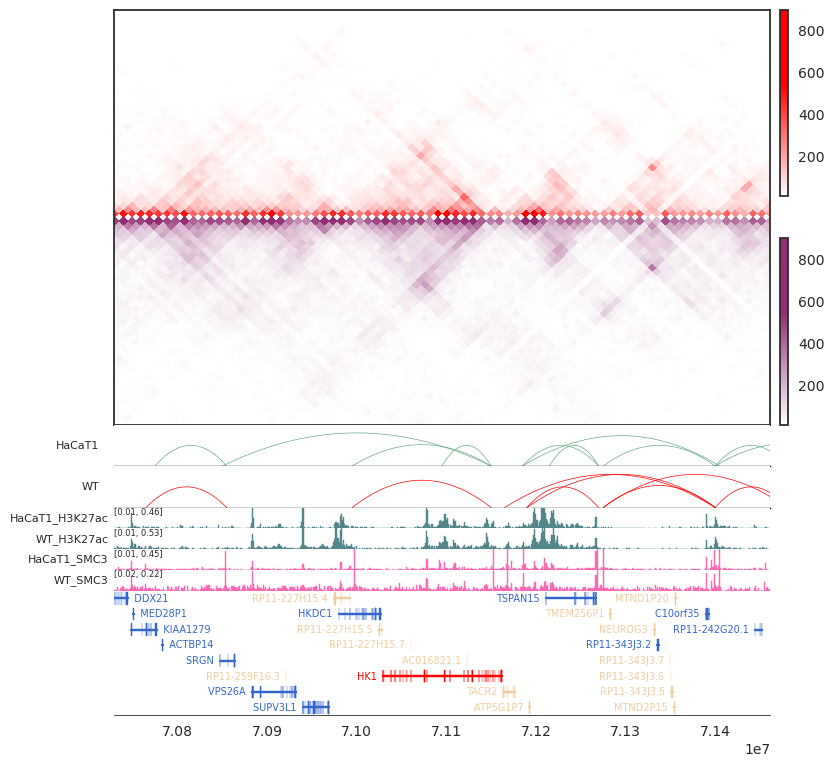

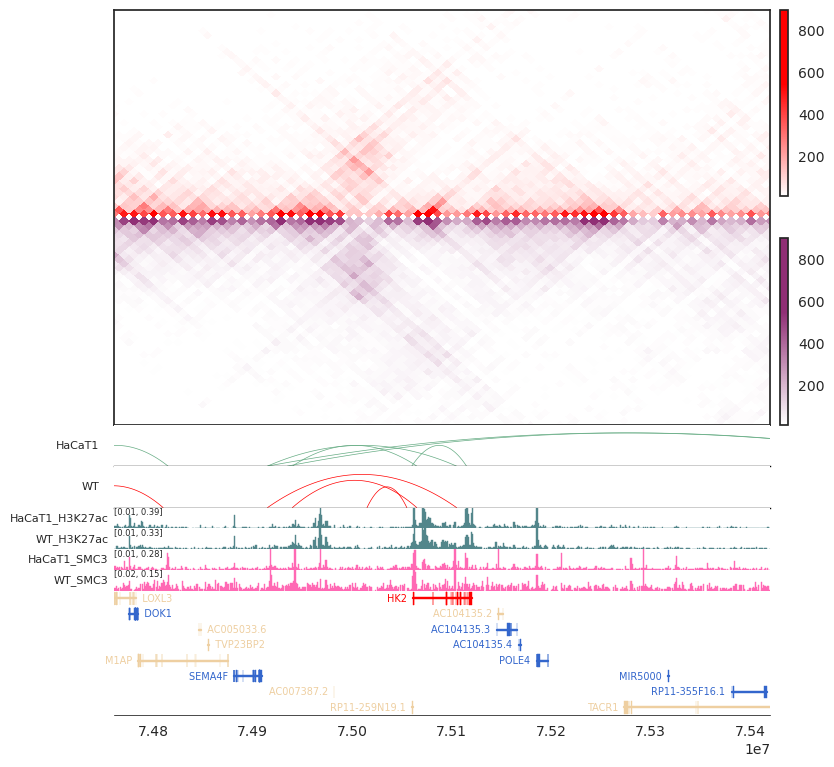

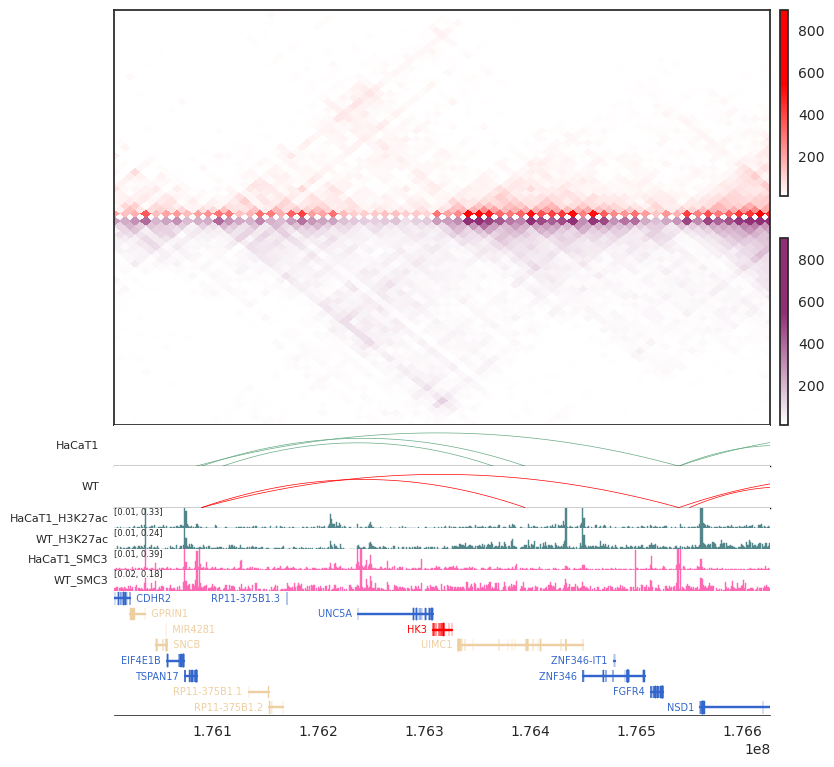

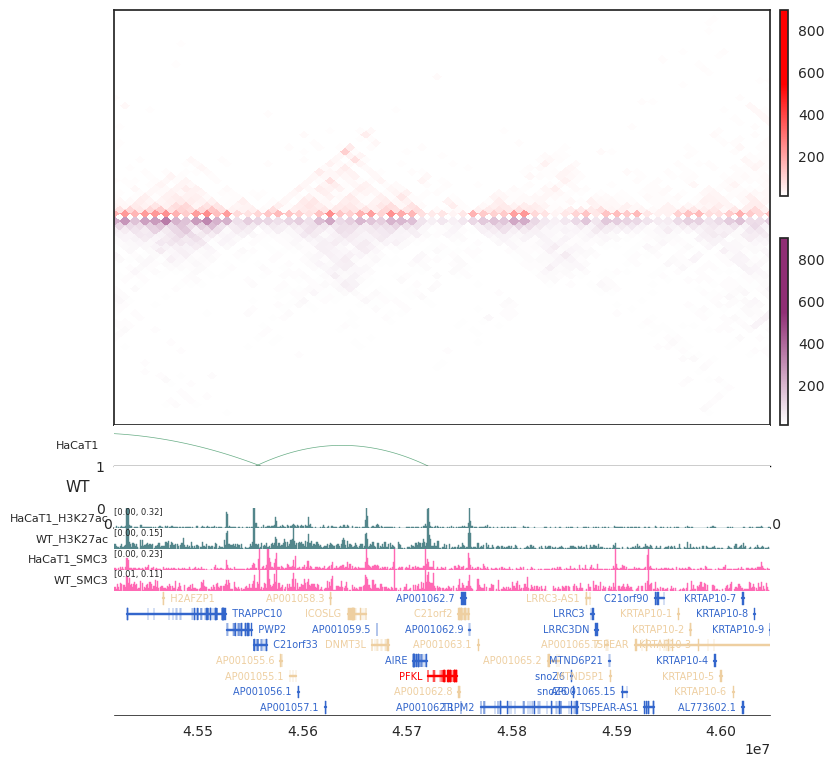

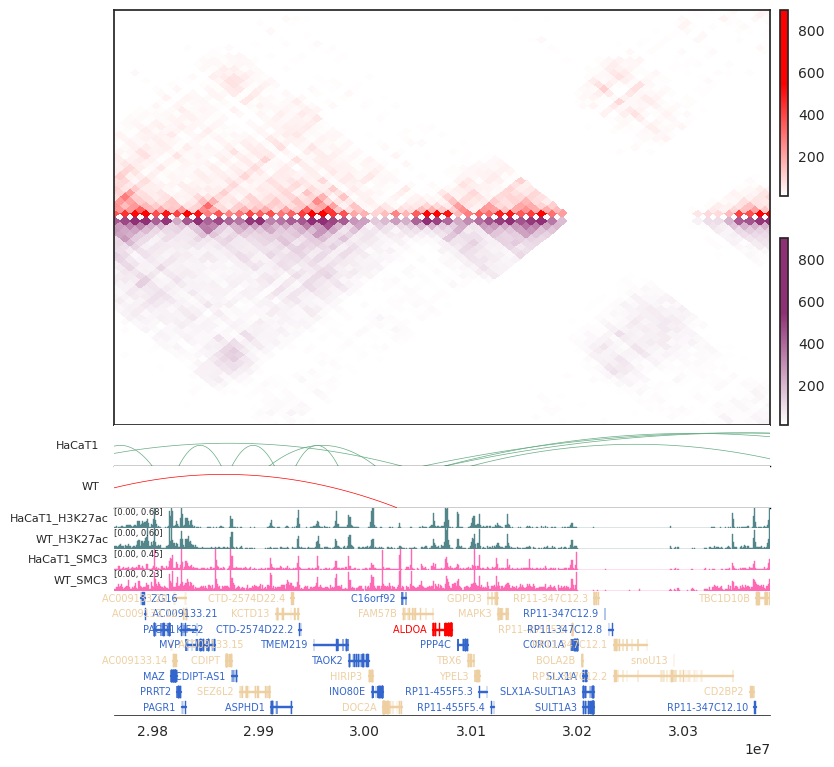

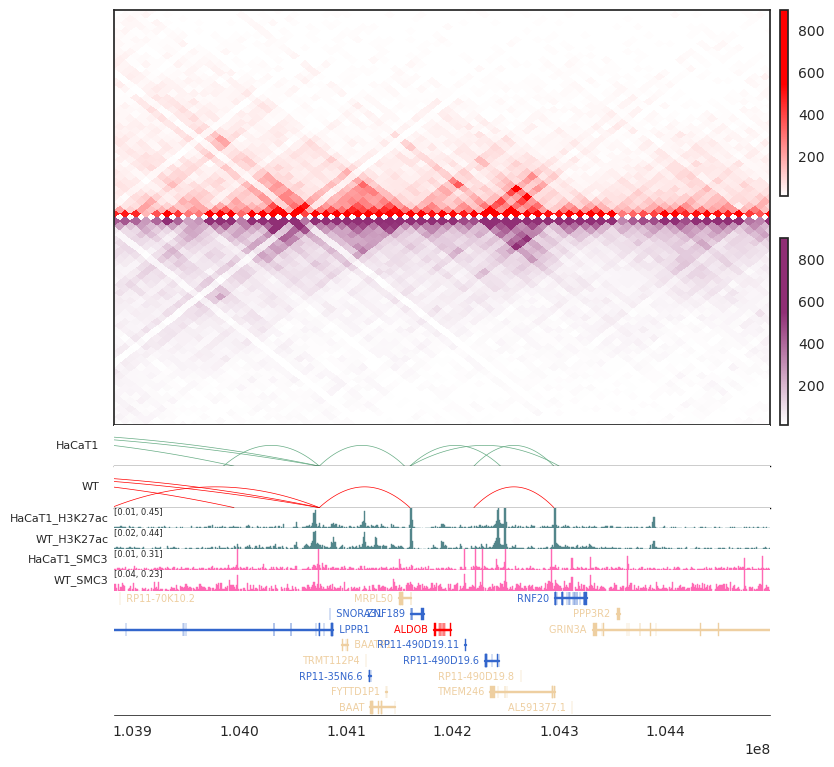

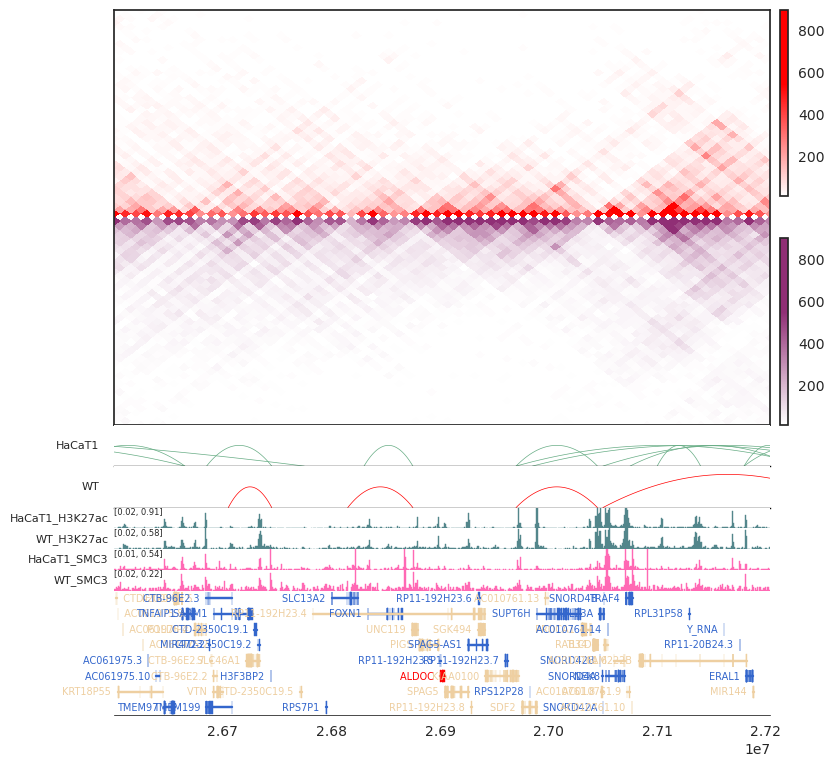

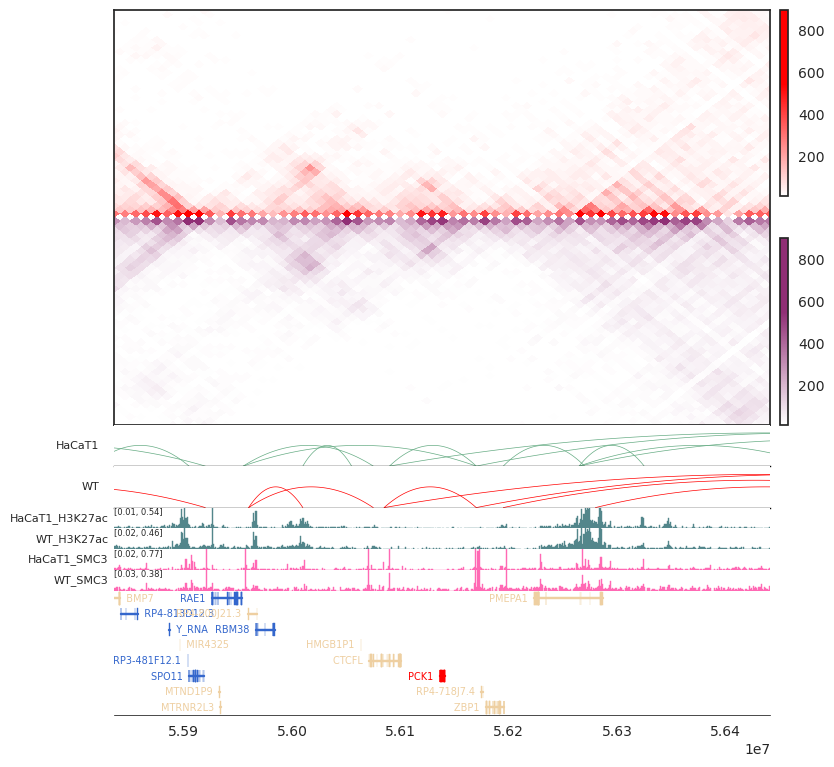

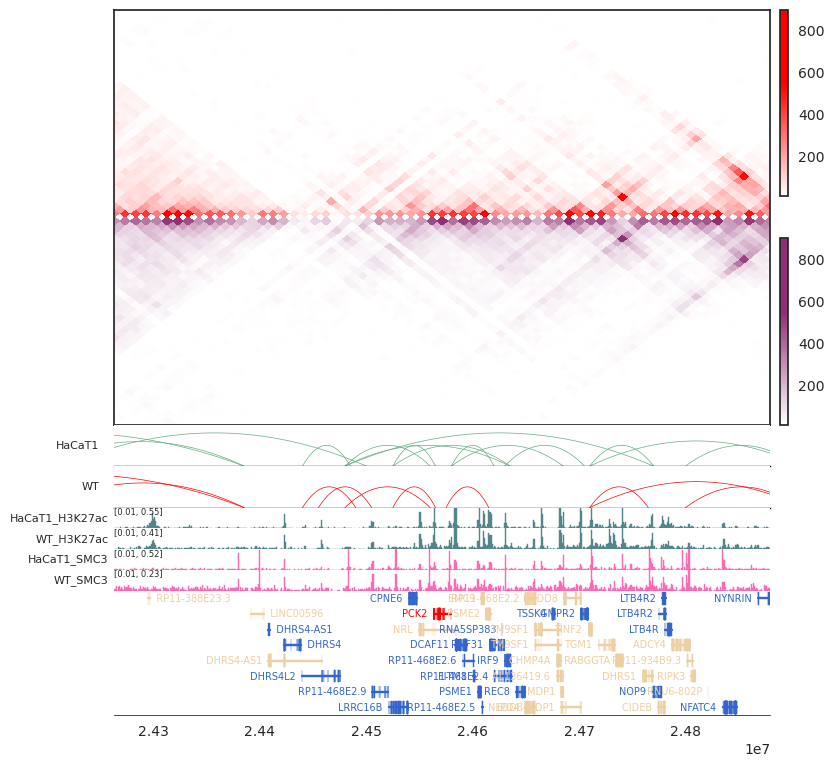

In [525]:
#pdf_pages2 = PdfPages('loop_track_2.pdf')

genes = ["HK1",  "HK2", "HK3", "PFKL", "ALDOA","ALDOB","ALDOC", "PCK1","PCK2", "PLA2", "DGKA"]

for gene_name in genes:
    chrom, start, end = gene_range(bed13, gene_name, ranges=300000)
    track_view_8([HaCaT1_cMat, WT_cMat], ["HaCaT1_cMat", "WT_cMat"], HaCaT1_loop, WT_loop, bed13, 
                 bws2, bwLabels2, trackColors2, 
                 chrom=chrom, start=int(start), end=int(end), markgene = gene_name, filename="{0}.pdf".format(gene_name))
#pdf_pages2.close()

In [36]:
import logging
import cooler
import pandas as pd
import numpy as np
from typing import Union, List, Sequence, Tuple, Collection, Optional
#from .._utils import GenomeRegion
import sys

class GenomeRegion:
    region = None
    chrom = None
    start = None
    end = None
    fetch_start = None
    fetch_end = None
    length = None
    isReverse = False
    
    def __init__(self, region: str):
        self.region = region
        tmp = region.split(":")
        self.chrom = tmp[0]
        if len(tmp)==2:
            self.start = int(tmp[1].split("-")[0])
            self.end = int(tmp[1].split("-")[1])
            if self.start > self.end:
                self.isReverse = True
                self.fetch_start = self.end
                self.fetch_end = self.start
            else:
                self.fetch_start = self.start
                self.fetch_end = self.end
            self.length = abs(self.start - self.end)

    def fetchRegion(self):
        fetch_r = self.chrom
        if self.fetch_start != None:
            fetch_r = fetch_r + ":" + str(self.fetch_start) + "-" +  str(self.fetch_end)
        return fetch_r

    def GenomeRegion2df(self):
        """
        region4coolFetch = self.chrom + ":" + str(self.start) + '-' + str(self.end)
        if self.start == None:
            region4coolFetch = self.chrom
        else:
            if self.start > self.end:
                region4coolFetch = self.chrom + ":" + str(self.end) + '-' + str(self.start)
        """
        region4coolFetch = self.fetchRegion()

        df = pd.DataFrame(
            {'chrom':[self.chrom], 
            'start':[self.start],
            'end':[self.end],
            'isReverse':[self.isReverse],
            'region4coolFetch': [region4coolFetch]
            }, 
            index=[self.region])

        return df
        
class RegionsCmat:
    def __init__(self, cmat: np.array, row_regions: pd.DataFrame, col_regions: pd.DataFrame):
        self.cmat = cmat
        self.row_regions = row_regions
        self.col_regions = col_regions

def subsetContactRegions(
        clr: cooler.Cooler, 
        balance: bool = False,
        divisive_weights = None,
        row_regions: Union[Sequence[str], str, None] = None,
        col_regions: Union[Sequence[str], str, None] = None, 
        ) -> RegionsCmat:
    """\
    Extract a set of regions matrix from the cool format Hi-C matrix.

    The extracted matrix will splice intra and Inter region interaction according to 
        the given order and direction of the regions.
    Parameters
    ----------
    coolMat 
        ``cooler.Cooler``: cool format Hi-C matrix (https://github.com/open2c/cooler)
    balance
        ``bool``: The ``'balance'`` parameters of ``coolMat.matrix(balance=False).fetch('chr6:119940450-123940450')``
    divisive_weights: bool, optional
        Force balancing weights to be interpreted as divisive (True) or
        multiplicative (False). Weights are always assumed to be
        multiplicative by default unless named KR, VC or SQRT_VC, in which
        case they are assumed to be divisive by default.

    row_regions
        ``chrom region`` list: or ``chrom region`` or None. 
        The subset matrix row genome regions
        eg. ``"chr6:1000000-2000000"``, eg. ``["chr6:1000000-2000000", "chr3:5000000-4000000", "chr5"]``
        The start can be larger than the end (eg. ``"chr6:2000000-1000000"``), 
            which means you want to get the reverse region contact matrix

    col_regions
        ``chrom region`` list: or ``chrom region`` or None. 
        The subset matrix col genome regions, default is ``None``, which means the sample region as ``row_regions``
        
    Returns:
        :class:`~trackc.RegionsCmat`
            row_regions and col_regions contact matrix object
    """
    # -------
    if isinstance(row_regions, list):
        row_GenomeRegions = pd.concat([GenomeRegion(i).GenomeRegion2df() for i in row_regions])
    else:
        row_GenomeRegions = GenomeRegion(row_regions)

    if col_regions == None:
        col_GenomeRegions = row_GenomeRegions.copy()
    else:
        if isinstance(col_regions, list):
            col_GenomeRegions = pd.concat([GenomeRegion(i).GenomeRegion2df() for i in col_regions])
        else:
            col_GenomeRegions = GenomeRegion(col_regions)
    
    # ------
    region_mat_dic = {}
    for _, row_row in row_GenomeRegions.iterrows():
        for _, col_row in col_GenomeRegions.iterrows():
            row_col_region_cmat = clr.matrix(balance=balance).fetch(row_row['region4coolFetch'], col_row['region4coolFetch'])
            if row_row['isReverse'] == True:
                row_col_region_cmat = np.flip(row_col_region_cmat, 0)
            if col_row['isReverse'] == True:
                row_col_region_cmat = np.flip(row_col_region_cmat, 1)

            region_mat_dic["{0}__{1}".format(row_row["region4coolFetch"], col_row["region4coolFetch"])] = row_col_region_cmat

    vstack_list = [None]*row_GenomeRegions.shape[0]
    hstack_list = [None]*col_GenomeRegions.shape[0]
    
    for i, row_region in enumerate(row_GenomeRegions["region4coolFetch"].to_list()):
        for ii, col_region in enumerate(col_GenomeRegions["region4coolFetch"].to_list()):
            hstack_list[ii] = region_mat_dic["{0}__{1}".format(row_region, col_region)]
        
        vstack_list[i] = np.hstack(tuple(hstack_list))
                          
    cMat = np.vstack(tuple(vstack_list))

    #### 
    row_GenomeRegions['cbins'] = 0
    col_GenomeRegions['cbins'] = 0

    row_index = row_GenomeRegions.index.to_list()
    col_index = col_GenomeRegions.index.to_list()

    for i in row_index:
        for ii in col_index:
            cmat_shape = region_mat_dic["{0}__{1}".format(
                row_GenomeRegions.loc[i, "region4coolFetch"], 
                col_GenomeRegions.loc[ii, "region4coolFetch"])].shape
            
            row_GenomeRegions.loc[i, "cbins"] = cmat_shape[0]
            col_GenomeRegions.loc[i, "cbins"] = cmat_shape[1]
            
    r_l_regions_cMat = RegionsCmat(cmat=cMat, row_regions=row_GenomeRegions, col_regions=col_GenomeRegions)
    
    return r_l_regions_cMat
        

def subsetCisRegion(
        clr: cooler.Cooler,
        region: str,
        extend: int = 0,
        balance: bool = False,
        divisive_weights = None,
        ) -> np.array:
    """\
    Extract cis contact matrix from the cool format Hi-C matrix.

    Parameters
    ----------
    clr: ``cooler.Cooler``
        cool format Hi-C matrix (https://github.com/open2c/cooler)
    region: ``str``
        The subset matrix row genome regions
        eg. ``"chr6:1000000-2000000"`` or ``chr6``

    extend: ``int``
        contact map extend to start and end position
    balance: ``bool``
        The ``'balance'`` parameters of ``coolMat.matrix(balance=False).fetch('chr6:119940450-123940450')``
    divisive_weights: bool, optional
        Force balancing weights to be interpreted as divisive (True) or
        multiplicative (False). Weights are always assumed to be
        multiplicative by default unless named KR, VC or SQRT_VC, in which
        case they are assumed to be divisive by default.

    Returns:
    ----------
    contact matrix: np.array
    """

    resolution = clr.binsize
    genome_region = GenomeRegion(region)

    if genome_region.chrom not in clr.chromsizes:
         logging.error(genome_region.chrom, ' is not a chrom in the cool matrix') 
    maxChromL = clr.chromsizes[genome_region.chrom]

    # ------
    if genome_region.fetch_start != None:
        genome_region.fetch_start = genome_region.fetch_start - extend*resolution
        if genome_region.fetch_start < 0:
            #genome_region.fetch_start = 0
            sys.stderr("extend is smolar than 0\n")
            sys.exit(1)

        genome_region.fetch_end = genome_region.fetch_end + extend*resolution
        if genome_region.fetch_end > maxChromL:
            #genome_region.fetch_end = maxChromL
            sys.stderr("extend is larger than chrom length\n")
            sys.exit(1)
    
    # ------
    df = clr.matrix(balance=balance, divisive_weights=divisive_weights).fetch(genome_region.fetchRegion())
    return df

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cooler
from typing import Union, Optional, Sequence, Any, Mapping, List, Tuple, Callable
import collections.abc as cabc
import matplotlib as mpl
#from ..plotting._utils import panel_grid, ColorLike
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from matplotlib.cm import get_cmap
from matplotlib.colors import Colormap
from matplotlib import rcParams, patheffects
from copy import copy
import matplotlib.pyplot as plt
import sys
from matplotlib.colors import LogNorm,CenteredNorm, SymLogNorm,PowerNorm, Normalize  
import seaborn as sns


fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
fruitpunch2 = sns.blend_palette(['white', 'blue'], as_cmap=True)

ColorLike = Union[str, Tuple[float, ...]]

def _check_na_color(
    na_color: Optional[ColorLike], *, img: Optional[np.ndarray] = None
) -> ColorLike:
    if na_color is None:
        if img is not None:
            na_color = (0.0, 0.0, 0.0, 0.0)
        else:
            na_color = "lightgray"
    return na_color

def getData2Map(mat, maxrange=None, minrange=None, trim_range=0.99):
    mat = mat.astype(float)
    #if logdata:
    #    mat = np.log2(mat)   
    mat[mat == np.inf] = 0.0
    mat[mat == -np.inf] = 0.0
    mat[mat == 0.0] = np.nan    
    
    df = pd.DataFrame(np.ravel(mat))
    df = df[df != np.nan]
    
    if np.nanmax(mat)>0:
        if trim_range <1 and maxrange==None and minrange==None:
            xmaxrange = np.nanpercentile(abs(df), trim_range*100)
            xminrange = np.nanpercentile(abs(df), 100 - trim_range*100)
            print("no max min range")
        else:
            if maxrange==None:
                xmaxrange = abs(df).max()[0]
            else:
                xmaxrange = maxrange
            if minrange==None:
                xminrange = abs(df).min()[0]
            else:
                xminrange = minrange

        mat[(mat<=xminrange) & (mat>0)] = xminrange    
        mat[(mat>=xmaxrange) & (mat>0)] = xmaxrange
        mat[(mat>= -xminrange) & (mat<0)] = -xminrange
        mat[(mat<= -xmaxrange) & (mat<0)] = -xmaxrange

        return mat, xmaxrange, xminrange
    else:
        print ("Warning: max data <0, no data to plot")

def hex2rgb(value):
    # convert hex to rgb
    value = value.lstrip('#')
    lv = len(value)
    rgb = tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    return np.array([rgb[0]/255, rgb[1]/255, rgb[2]/255, 1])

def colorC(cname="RdBu_r", bottom_color="#ffffff", bad_color="white", over_color="white", under_color="white", alpha=0):
    #cname = ["twilight_shifted", "jet", "RdBu_r", "RdGy_r", "BrBG_r", "hot_r", "Spectral_r"]
    #cname = ["terrain_r", "ocean", "gist_earth", "gist_stern_r", "tab20b", "twilight"]
    from matplotlib.colors import ListedColormap
    if isinstance(cname, str):
        cmap=plt.get_cmap(cname)
    else:
        cmap=cname

    cmap.set_bad(color=bad_color, alpha=alpha)
    cmap.set_over(color=over_color, alpha=alpha)
    cmap.set_under(color=under_color, alpha=alpha)

    if bottom_color==None:
        return cmap

    bottom_color = hex2rgb(bottom_color)
    newcolors = cmap(np.linspace(0, 1, 256))
    #white = np.array([1, 1, 1, 1])
    newcolors[0, :] = bottom_color
    newcmap = ListedColormap(newcolors)

    return newcmap

def plot_pcolormesh( 
    mat: np.ndarray,
    ax: Axes,
    norm=None,
    clim=None,
    cmap: Union[Colormap, str, None] = None,
    trans_ax: bool=False
    ):

    N = mat.shape[1]
    # Transformation matrix for rotating the heatmap.
    A = np.array([(y, x) for x in range(N, -1, -1) for y in range(N + 1)])
    t = np.array([[1,0.5], [-1,0.5]])
    A = np.dot(A, t)
  
    C = mat
    X = A[:, 1].reshape(N + 1, N + 1)
    Y = A[:, 0].reshape(N + 1, N + 1)

    if trans_ax==False:
        caxes = ax.pcolormesh(X, Y, np.flipud(C), cmap=cmap, edgecolor='none', norm=norm, clim=clim, snap=True, linewidth=.001)
    else:
        caxes = ax.pcolormesh(Y, X, np.flipud(C), cmap=cmap, edgecolor='none', norm=norm, clim=clim, snap=True, linewidth=.001)
    
    return caxes

def mapC_triview(
    mat: np.ndarray,
    ax: Optional[Axes] = None,
    cmap: Union[Colormap, str, None] = fruitpunch,
    label: Union[str, None] = None,
    logdata: bool = False, 
    trim_range: float = 0.98,
    maxrange: float = None,
    minrange: float = None,
    height: int = 0,
    trans_ax: bool = False,
    map_type: Union[str, None] = 'triangle',
    map_order: int = 0,
    symmetric: bool = False,
    k = 1
    ): 
    """\
    Draw triangle view of the C data

    Parameters
    mat:

    cmap
    map_type
        contact heatmap type, can be one of ``['square', 'triangle', 'rectangle']``,
        if select ``rectangle`` the ``mapHeight`` parameter should be set.
    mapHeight: int or None
        Parameter for ``map_type: rectangle'``, ``map_type: triangle'`` also can be set.
        it means the heapmap hight bin number

    map_order: int
        0: np.triu()
        1: np.tril()
    k: int
        ``np.tril`` or ``np.triu`` ``k`` parameter

    """
    mat, maxrange, minrange = getData2Map(mat, maxrange=maxrange, minrange=minrange, trim_range=trim_range)
    print("maxrange:", maxrange ,"minrange:",minrange)

    if symmetric==False:
        if map_order==0:
            mat = np.triu(mat, k = k)
            mat[mat==0.0] = np.nan
        elif  map_order==1:
            mat = np.tril(mat, k = k)
            mat[mat==0.0] = np.nan
        else:
            pass
    
    norm = None
    if logdata:
        norm=LogNorm()
    
    clim = (minrange, maxrange)
    if map_type=='square':
        im = ax.matshow(mat, cmap=cmap, norm=norm, clim=clim)
    else:
        if map_type=='triangle':
            im = plot_pcolormesh(mat=mat, ax=ax, norm=norm, clim=clim, cmap=cmap, trans_ax=trans_ax)
 
        if map_type=='rectangle':
            im = plot_pcolormesh(mat=mat, ax=ax, norm=norm, clim=clim, cmap=cmap, trans_ax=trans_ax)

    mapC_colorbar(ax, im, trans_ax, map_order, height, map_type)
    
    return im

def mapC_colorbar(ax, im, trans_ax, map_order, height, map_type):
    x0, y0, x0_width, y0_height = 0, 1.015, 1, 0.015
    if trans_ax == False:
        x0, y0, x0_width, y0_height = 1.015, 0, 0.015, 1
        if map_order in [0, 1]:
            y0_height = 0.45
            if height > 0 :
                x0_width = 0.012
            else:
                x0_width = 0.04
            if map_order==0:
                y0 = 0.55
            else:
                y0 = 0
        else:
            x0_width = 0.04
            if height > 0 :
                x0_width = 0.012
    else:
        if map_order in [0, 1]:
            x0_width = 0.45
            if height > 0 :
                y0_height = 0.012
            else:
                y0_height = 0.04
            if map_order==0:
                x0 = 0.55
            else:
                x0 = 0
        else:
            y0_height = 0.04
            if height > 0 :
                y0_height = 0.012

    orientation = 'vertical'
    if trans_ax:
        orientation = 'horizontal'
    
    cax = ax.inset_axes([x0, y0, x0_width, y0_height])
    cbar = plt.colorbar(im, ax=ax, cax=cax, orientation=orientation)
    if trans_ax:
        cbar.ax.xaxis.tick_top()
        cbar.ax.tick_params(axis='x', labelrotation=90)
    else:
        cbar.ax.yaxis.tick_right()
    #cbar.set_label(label, fontsize=8)

def paraPair(para):
    if isinstance(para, list)==False:
        return([para, para])
    else:
        if len(para)==1:
            para[1] = para[0]
    return para

def mapC(
    mat: Union[np.ndarray, None]  = None,
    mat2: Union[np.ndarray, None] = None,

    cmap: Union[Sequence[Colormap], Sequence[str], Colormap, str, None] = fruitpunch,
    label: Union[Sequence[str], str, None] = None,
    logdata: Union[Sequence[bool], bool] = False, 
    maxrange: Union[Sequence[float], float]=None,
    minrange: Union[Sequence[float], float]=None,
    trim_range: Union[Sequence[float], float]=0.99,

    ax: Optional[Axes] = None,
    #na_color: ColorLike = None,
    map_type: Union[str, None] = 'triangle',
    height: int = 0,
    trans_ax: bool = False,
    symmetric: bool = False,
    ax_on=True
    ):
    """\
    Draw triangle view of the C data

    Parameters
    mat:

    cmap
    map_type
        contact heatmap type, can be one of ``['square', 'triangle', 'rectangle']``,
        if select ``rectangle`` the ``mapHeight`` parameter should be set.
    mapHeight: int or None
        Parameter for ``map_type: rectangle'``, ``map_type: triangle'`` also can be set.
        it means the heapmap hight bin number
    symmetric: bool
        If there is one of ``mat`` and ``mat2`` para is None, 
        value ``True`` means the  symmetric heatmap

    """

    #cmap = copy(get_cmap(cmap))
    #cmap.set_bad(na_color)
    #cmap2 = copy(get_cmap(cmap2))
    #cmap2.set_bad(na_color)
    cmap = paraPair(cmap)
    label = paraPair(label)
    logdata = paraPair(logdata)
    maxrange = paraPair(maxrange)
    minrange = paraPair(minrange)
    trim_range = paraPair(trim_range)

    k = 1
    k2 = -1
    map_order = None
    map_order2 = None

    if isinstance(mat, np.ndarray)==False:
        k2 = 0
    if isinstance(mat2, np.ndarray)==False:
        k = 0

    if isinstance(mat, np.ndarray) and isinstance(mat2, np.ndarray):
        map_order = 0
        map_order2 = 1
 
    if isinstance(mat, np.ndarray):
        im = mapC_triview(
            mat=mat,
            ax=ax,
            cmap=cmap[0],
            label=label[0],
            logdata=logdata[0], 
            maxrange=maxrange[0],
            minrange = minrange[0],
            trim_range=trim_range[0],
            height=height,
            trans_ax=trans_ax,
            map_type=map_type,
            map_order=map_order,
            symmetric=symmetric,
            k = k
        )

    if isinstance(mat2, np.ndarray):
        im2 = mapC_triview(
            mat=mat2,
            ax=ax,
            cmap=cmap[1],
            label=label[1],
            logdata=logdata[1], 
            maxrange=maxrange[1],
            minrange = minrange[1],
            trim_range=trim_range[1],
            height=height,
            trans_ax=trans_ax,
            map_type=map_type,
            map_order=map_order2,
            symmetric=symmetric,
            k = k2
        )
   
    if map_type in ['triangle', 'rectangle']:
        if isinstance(mat2, np.ndarray)==False:
            if symmetric==False:
                if height > 0:
                    if trans_ax==False:
                        ax.set_ylim(0,height)
                        if map_type == 'rectangle':
                            ax.set_xlim(height, mat.shape[0]-height)
                    else:
                        ax.set_xlim(0,height)
                        if map_type == 'rectangle':
                            ax.set_ylim(height, mat.shape[0]-height)
                else:
                    if trans_ax==False:
                        ax.set_ylim(bottom=0)
                    else:
                        ax.set_xlim(left=0)
            else:
                if height > 0:
                    if trans_ax==False:
                        ax.set_ylim(-height, height)
                        if map_type == 'rectangle':
                            ax.set_xlim(height, mat.shape[0]-height)
                    else:
                        ax.set_xlim(-height, height)
                        if map_type == 'rectangle':
                            ax.set_ylim(height, mat.shape[0]-height)

        if isinstance(mat, np.ndarray)==False:
            if symmetric==False:
                if height > 0:
                    if trans_ax==False:
                        ax.set_ylim(-height, 0)
                        if map_type == 'rectangle':
                            ax.set_xlim(height, mat2.shape[0]-height)
                    else:
                        ax.set_xlim(-height,0)
                        if map_type == 'rectangle':
                            ax.set_ylim(height, mat2.shape[0]-height)
                else:
                    if trans_ax==False:
                        ax.set_ylim(top=0)
                    else:
                        ax.set_xlim(right=0)

            else:
                if height > 0:
                    if trans_ax==False:
                        ax.set_ylim(-height, height)
                        if map_type == 'rectangle':
                            ax.set_xlim(height, mat2.shape[0]-height)
                    else:
                        ax.set_xlim(-height, height)
                        if map_type == 'rectangle':
                            ax.set_ylim(height, mat2.shape[0]-height)

    if isinstance(mat, np.ndarray) and isinstance(mat2, np.ndarray):
        if height > 0:
            if trans_ax==False:
                ax.set_ylim(-height, height)
            else:
                ax.set_xlim(-height, height)
            
        if map_type == 'rectangle':
            if trans_ax==False:
                ax.set_xlim(height, mat2.shape[0]-height)
            else:
                ax.set_ylim(height, mat2.shape[0]-height)

    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_yticks([]) 
    if ax_on==False:
        ax.axis('off')

def plot_heatmap_triangle_xticks(ax, regin1_binN, regin2_binN, chrom1, start1, end1, chrom2, start2, end2, showXticks):
    #ax.set_xticks([])
    ax.set_xticks([0, regin1_binN, regin1_binN + regin2_binN])
    ax.set_xticklabels([start1, str(end1) + " " + str(start2), end2])
    
    ax.set_yticklabels([])
    ax.set_yticks([])
    
    ax.xaxis.tick_top()
    ax.spines['top'].set_color('k')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')

   
def colorbar_triangle(axm,im,ymax):
    height="2%"
    width="10%"
    if ymax!=None:
        height="6%"
    axins1 = inset_axes(axm, width=width, height=height, loc=4, bbox_to_anchor=(-0.1, 0.7, 1.2, 2.9), bbox_transform=axm.transAxes,)
    cbar=plt.colorbar(im, cax=axins1, orientation='horizontal')
    cbar.ax.xaxis.tick_top()
    cbar.ax.spines['top'].set_color('none')
    cbar.ax.spines['right'].set_color('none')
    cbar.ax.spines['bottom'].set_color('none')
    cbar.ax.spines['left'].set_color('none')


"""
def plot_chrom_arrow(ax, region_len, rev_region, regions, colors=my23colors[3:22]):
    ax.axis("off")
    ax.set_xlim(0,sum(region_len))
    ax.set_ylim(-2,2)
    
    start = 0
    for i, v in enumerate(region_len):
        if rev_region[i] == True:
            arrow = mpatches.FancyArrowPatch((start+v+1, 0), (start-1, 0), mutation_scale=30, color=colors[i])
            ax.add_patch(arrow) 
        else:
            arrow = mpatches.FancyArrowPatch((start-1, 0), (start+v+1, 0), mutation_scale=30, color=colors[i])
            ax.add_patch(arrow) 
            
        #ax.add_patch(arrow)    
        chrom, start_str, end_str = split_region(regions[i])
        #ax.text(start+region_len[i]/2, -1.5, chrom, horizontalalignment='center', verticalalignment='top', fontsize=10, color=colors[i])
        ax.text(start+region_len[i]/2, 0, chrom, horizontalalignment='center', verticalalignment='center', fontsize=10, color="black")
        
        ax.text(start, -1.5, start_str, horizontalalignment='left', verticalalignment='top', fontsize=9, color=colors[i], rotation=90)
        ax.text(start+region_len[i], -1.5, end_str, horizontalalignment='right', verticalalignment='top', fontsize=9, color=colors[i], rotation=90)
        start = start + v

"""    
    
        



'\ndef plot_chrom_arrow(ax, region_len, rev_region, regions, colors=my23colors[3:22]):\n    ax.axis("off")\n    ax.set_xlim(0,sum(region_len))\n    ax.set_ylim(-2,2)\n    \n    start = 0\n    for i, v in enumerate(region_len):\n        if rev_region[i] == True:\n            arrow = mpatches.FancyArrowPatch((start+v+1, 0), (start-1, 0), mutation_scale=30, color=colors[i])\n            ax.add_patch(arrow) \n        else:\n            arrow = mpatches.FancyArrowPatch((start-1, 0), (start+v+1, 0), mutation_scale=30, color=colors[i])\n            ax.add_patch(arrow) \n            \n        #ax.add_patch(arrow)    \n        chrom, start_str, end_str = split_region(regions[i])\n        #ax.text(start+region_len[i]/2, -1.5, chrom, horizontalalignment=\'center\', verticalalignment=\'top\', fontsize=10, color=colors[i])\n        ax.text(start+region_len[i]/2, 0, chrom, horizontalalignment=\'center\', verticalalignment=\'center\', fontsize=10, color="black")\n        \n        ax.text(start, -1.5